In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os.path as op
import glob
import matplotlib.pyplot as plt
import ast
# import moss
import csv
import random
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import os
from pandas import Timestamp
from datetime import timedelta
from sklearn.preprocessing import StandardScaler


In [2]:
home_dir = op.abspath('./')

data_files = glob.glob(op.join(home_dir,
                        'data',
                        '*.csv'))
sns.set_context('talk')

In [3]:
df_orig = pd.read_csv('pilot6_nonresp_inc_test_diff_stats.csv')

participant_set = set(df_orig['participant'])

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22623/4029650255.py:1: DtypeWarning: Columns (195,196,271,272) have mixed types. Specify dtype option on import or set low_memory=False.
  df_orig = pd.read_csv('pilot6_nonresp_inc_test_diff_stats.csv')


In [4]:
df_orig['validity_binary']

0        1
1        1
2        1
3        1
4        1
        ..
32005    0
32006    1
32007    1
32008    0
32009    1
Name: validity_binary, Length: 32010, dtype: int64

In [5]:
df = []
for sub in data_files:
    try:
        sub_df = pd.read_csv(sub)
        
        # Filter for participants in participant_set
        if any(sub_df['participant'].isin(participant_set)):
            # Filter for non-empty 'image_recall_response.keys' and reset the index
            data = sub_df.loc[sub_df['image_recall_response.keys'].notna()].reset_index(drop=True)
            df.append(data.copy())
    except Exception as e:
        print(f"Error processing file {sub}: {e}")
        
# Concatenate all filtered data into a single DataFrame
df = pd.concat(df, ignore_index=True)

# Get the count of unique participants
unique_participants_count = len(set(df['participant']))
print(unique_participants_count)

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-09_12h13.56.688.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-22_22h11.53.949.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-08-28_19h01.07.543.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-09-04_02h15.32.256.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-21_13h00.30.594.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-08-29_23h04.21.655.csv: No columns to parse from file
Error processing file /Users/lana/Deskto

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-06-04_16h47.14.580.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-18_09h47.19.365.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-22_13h46.08.948.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-14_15h57.31.348.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-08-28_10h00.52.918.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/150652_WM_Deepgen_2023-08-02_11h33.40.328.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psy

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2025-01-21_23h30.35.955.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/155275_WM_Deepgen_2024-11-28_11h53.16.558.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-14_17h20.02.635.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-12_01h02.06.878.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-08-14_19h38.28.940.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-06-04_23h34.43.802.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psy

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-09-01_13h46.29.760.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-12_23h08.40.152.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/167176_WM_Deepgen_2024-12-02_13h24.03.783.csv: 'image_recall_response.keys'
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/155275_WM_Deepgen_2024-11-28_11h53.28.226.csv: 'image_recall_response.keys'
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-21_21h45.14.516.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-22_18h27.14.124.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyEx

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-09-02_19h09.08.042.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-04-30_22h39.40.712.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-15_18h08.37.098.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/131596_WM_Deepgen_2024-09-02_03h37.35.461.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/167176_WM_Deepgen_2024-12-02_13h25.51.497.csv: 'image_recall_response.keys'
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-16_16h03.30.145.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyE

In [6]:
df_orig['Prioritized - Deprioritized IT Distractor Similarity'] 

0                  NaN
1                     
2        Least Similar
3        Least Similar
4                  NaN
             ...      
32005    Least Similar
32006              NaN
32007    Least Similar
32008                 
32009                 
Name: Prioritized - Deprioritized IT Distractor Similarity, Length: 32010, dtype: object

In [7]:
# df['it_sim_dis_unattend']

In [8]:
len(set(df['participant']))

105

In [9]:
df

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,ImagePath,key_resp_18.rt,key_resp_18.duration,end_exp.started,end_exp.stopped,key_resp_14.rt,key_resp_14.duration,key_resp_12.rt,key_resp_12.duration,trials_2.order
0,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,./stimuli/new_foil_stims/broccoli_01b.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,./stimuli/new_foil_stims/windowsill_07s.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,./stimuli/new_foil_stims/bolo_tie_08s.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,./stimuli/216_3.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,./stimuli/new_foil_stims/oilcan_08s.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25588,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,./stimuli/141_2.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25589,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,./stimuli/new_foil_stims/speedboat_09s.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25590,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,./stimuli/274_1.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25591,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,./stimuli/new_foil_stims/mannequin_02s.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_orig

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,Tested - Untested V2 Distractor Similarity Ranges,Tested - Untested IT Distractor Similarity Ranges,Tested - Untested V2 Distractor Similarity Squared Ranges,Tested - Untested IT Distractor Similarity Squared Ranges,tested_item,ret_rel,V2 Distractor Similarity to Tested Item,IT Distractor Similarity to Tested Item,v2_sim_dis_test_sq_z,it_sim_dis_test_sq_z
0,NaN,NaN,124081,2024-11-26 23:55:34.580,WM_Deepgen,2023.2.1,MacIntel,31.250000,NaN,NaN,...,"(-0.17, -0.1]","(-0.84, -0.35]","(0.0083, 0.02]","(-0.32, 0.043]",prioritized,low,-0.827799,-1.060708,-0.242692,0.151017
1,NaN,NaN,124081,2024-11-26 23:55:34.580,WM_Deepgen,2023.2.1,MacIntel,31.250000,NaN,NaN,...,"(0.1, 0.17]","(-0.35, 0.26]","(0.0083, 0.02]","(-0.56, -0.5]",prioritized,high,0.990194,0.893147,-0.015047,-0.244192
2,NaN,NaN,124081,2024-11-26 23:55:34.580,WM_Deepgen,2023.2.1,MacIntel,31.250000,NaN,NaN,...,"(-0.17, -0.1]","(-1.2, -0.84]","(0.0083, 0.02]","(0.043, 0.41]",prioritized,high,-1.504238,-0.923925,0.973651,-0.176682
3,NaN,NaN,124081,2024-11-26 23:55:34.580,WM_Deepgen,2023.2.1,MacIntel,31.250000,NaN,NaN,...,"(0.039, 0.1]","(-1.2, -0.84]","(-0.0044, 0.00079]","(0.043, 0.41]",prioritized,high,0.353178,-1.295702,-0.674888,0.819469
4,NaN,NaN,124081,2024-11-26 23:55:34.580,WM_Deepgen,2023.2.1,MacIntel,31.250000,NaN,NaN,...,"(-0.1, -0.04]","(-0.84, -0.35]","(-0.0044, 0.00079]","(-0.5, -0.32]",prioritized,high,0.302596,-0.640445,-0.700465,-0.712015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32005,NaN,NaN,170536,2025-01-21 23:50:49.337,WM_Deepgen,2023.2.1,Win32,59.171598,NaN,NaN,...,"(-0.17, -0.1]","(0.75, 1.2]","(0.0083, 0.02]","(0.043, 0.41]",deprioritized,low,-1.029607,1.251809,0.046335,0.684487
32006,NaN,NaN,170536,2025-01-21 23:50:49.337,WM_Deepgen,2023.2.1,Win32,59.171598,NaN,NaN,...,"(-0.1, -0.04]","(-0.84, -0.35]","(-0.0044, 0.00079]","(-0.5, -0.32]",prioritized,low,-0.354631,0.485972,-0.674095,-0.922062
32007,NaN,NaN,170536,2025-01-21 23:50:49.337,WM_Deepgen,2023.2.1,Win32,59.171598,NaN,NaN,...,"(0.1, 0.17]","(-0.84, -0.35]","(0.00079, 0.0083]","(0.043, 0.41]",prioritized,low,0.535585,-0.711524,-0.549885,-0.596013
32008,NaN,NaN,170536,2025-01-21 23:50:49.337,WM_Deepgen,2023.2.1,Win32,59.171598,NaN,NaN,...,"(-0.1, -0.04]","(-0.84, -0.35]","(-0.0044, 0.00079]","(-0.5, -0.32]",deprioritized,low,-1.712122,-0.819826,1.489209,-0.395808


In [11]:
# df_orig['image_recall_response_count']

In [12]:
combined_df = pd.concat([df, df_orig], ignore_index=True)


In [13]:
response_counts = combined_df.groupby('participant')['image_recall_response.keys'].count().reset_index()

response_counts = response_counts.rename(columns={'image_recall_response.keys': 'image_recall_response_count'})

print(response_counts)

     participant  image_recall_response_count
0         124081                          240
1         124180                          240
2         124750                          240
3         124819                          240
4         125722                          240
..           ...                          ...
102       169168                          240
103       169183                          240
104       169345                          240
105       169375                          236
106       170536                          238

[107 rows x 2 columns]


In [14]:
min_response_count = response_counts['image_recall_response_count'].min()
min_response_count

0

In [15]:
threshold = 250 * (2 / 3)

below_threshold_count = (response_counts['image_recall_response_count'] < threshold).sum()

print(f"The number of participants with image_recall_response.keys count below {threshold} is: {below_threshold_count}")

The number of participants with image_recall_response.keys count below 166.66666666666666 is: 2


In [16]:
combined_df['acc_recall'] = np.where(combined_df['ImagePath'].str.contains("foil", case=False, na=False), 0, 1)




/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22623/1974338098.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['acc_recall'] = np.where(combined_df['ImagePath'].str.contains("foil", case=False, na=False), 0, 1)


In [17]:
# combined_df['acc_recall']

In [18]:
combined_df['mem_answ'] = np.where(combined_df['image_recall_response.keys'].isin([1, 2]), 0,
                                   np.where(combined_df['image_recall_response.keys'].isin([3, 4]), 1, np.nan))


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22623/2647953418.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['mem_answ'] = np.where(combined_df['image_recall_response.keys'].isin([1, 2]), 0,


In [19]:
combined_df['mem_answ']

0        0.0
1        0.0
2        0.0
3        1.0
4        1.0
        ... 
57598    NaN
57599    NaN
57600    NaN
57601    NaN
57602    NaN
Name: mem_answ, Length: 57603, dtype: float64

In [20]:
combined_df['recall_answ'] = np.where(
    combined_df['mem_answ'].isna() | combined_df['acc_recall'].isna(), np.nan,
    np.where(
        (combined_df['mem_answ'] == 0) & (combined_df['acc_recall'] == 0) | 
        (combined_df['mem_answ'] == 1) & (combined_df['acc_recall'] == 1), 1, 0)
)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22623/1958824526.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['recall_answ'] = np.where(


In [21]:
combined_df['recall_answ']

0        1.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
57598    NaN
57599    NaN
57600    NaN
57601    NaN
57602    NaN
Name: recall_answ, Length: 57603, dtype: float64

In [22]:
# count_gt_120 = combined_df[combined_df['image_recall_response.rt'] > 10].shape[0]
# count_gt_120

In [23]:
combined_df = combined_df[combined_df['image_recall_response.rt'] <= 4]


In [24]:
recall_count_per_participant = combined_df.groupby('participant')['recall_answ'].sum().reset_index()

recall_count_per_participant = recall_count_per_participant.rename(columns={'recall_answ': 'recall_answ_count'})

print(recall_count_per_participant)

     participant  recall_answ_count
0         124081              150.0
1         124180              123.0
2         124750              144.0
3         124819              170.0
4         125722              145.0
..           ...                ...
100       169168              158.0
101       169183              163.0
102       169345              154.0
103       169375              105.0
104       170536              123.0

[105 rows x 2 columns]


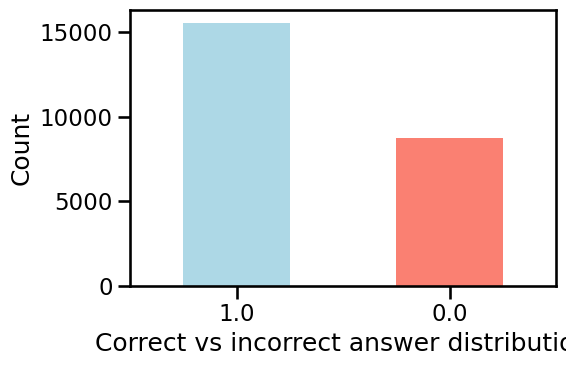

In [25]:
recall_counts = combined_df['recall_answ'].value_counts()

plt.figure(figsize=(6, 4))
recall_counts.plot(kind='bar', color=['lightblue', 'salmon'])
# plt.title('Counts of Recall Ans = 1 vs 0')
plt.xlabel('Correct vs incorrect answer distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

In [26]:
answer_mapping = {1: 'Definitely not seen', 2: 'Probably not seen',
                  3: 'Probably seen', 4: 'Definitely seen'}

combined_df['Answer Labels'] = combined_df['image_recall_response.keys'].map(answer_mapping)


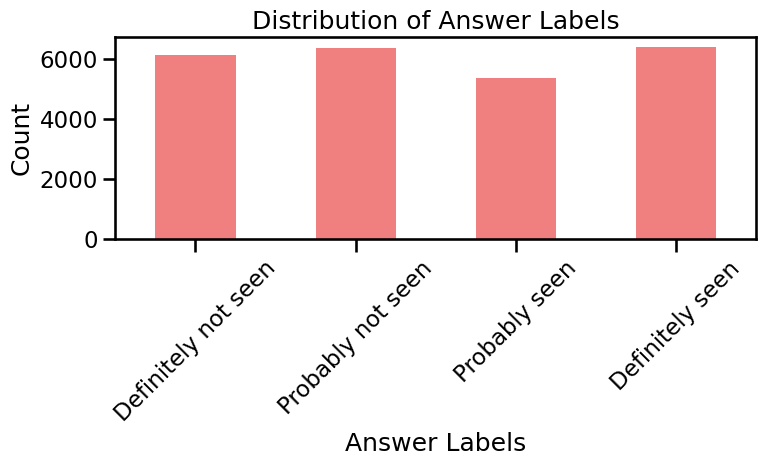

In [27]:
label_order = [
    'Definitely not seen', 
    'Probably not seen', 
    'Probably seen', 
    'Definitely seen'
]

# Count occurrences and sort by the defined order
answer_counts = combined_df['Answer Labels'].value_counts()
answer_counts = answer_counts.reindex(label_order)

plt.figure(figsize=(8, 5))
answer_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Answer Labels')
plt.xlabel('Answer Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

In [28]:
df = combined_df

In [29]:
correctLTM_df = df[df['recall_answ'] == 1]

correctLTM_df['Answer Labels'] = correctLTM_df['image_recall_response.keys'].map(answer_mapping)


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22623/2467276519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correctLTM_df['Answer Labels'] = correctLTM_df['image_recall_response.keys'].map(answer_mapping)


In [30]:
answer_counts_corr = correctLTM_df['Answer Labels'].value_counts()
answer_counts_corr = answer_counts_corr.reindex(label_order)

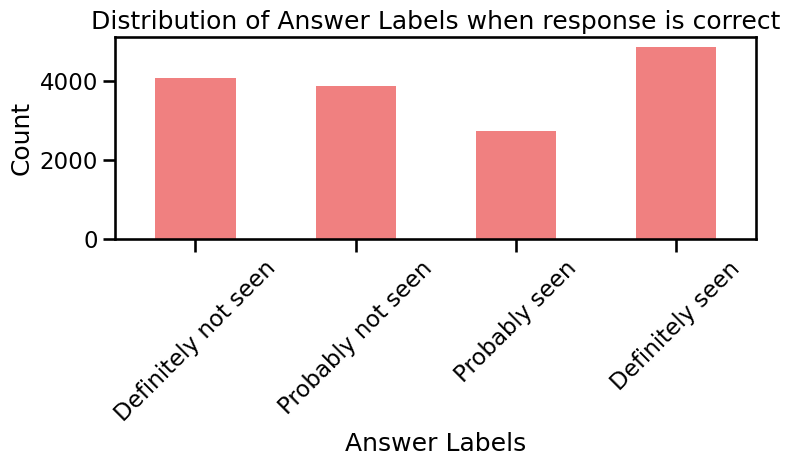

In [31]:
plt.figure(figsize=(8, 5))
answer_counts_corr.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Answer Labels when response is correct')
plt.xlabel('Answer Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

In [32]:
correctLTM_df['Answer Labels']

1        Definitely not seen
2          Probably not seen
3            Definitely seen
5          Probably not seen
6            Definitely seen
                ...         
25583    Definitely not seen
25584    Definitely not seen
25587          Probably seen
25588          Probably seen
25592        Definitely seen
Name: Answer Labels, Length: 15535, dtype: object

In [33]:
wrongLTM_df = df[df['recall_answ'] == 0]

wrongLTM_df['Answer Labels'] = wrongLTM_df['image_recall_response.keys'].map(answer_mapping)


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22623/1338151430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrongLTM_df['Answer Labels'] = wrongLTM_df['image_recall_response.keys'].map(answer_mapping)


In [34]:
answer_counts_incorr = wrongLTM_df['Answer Labels'].value_counts()
answer_counts_incorr = answer_counts_incorr.reindex(label_order)

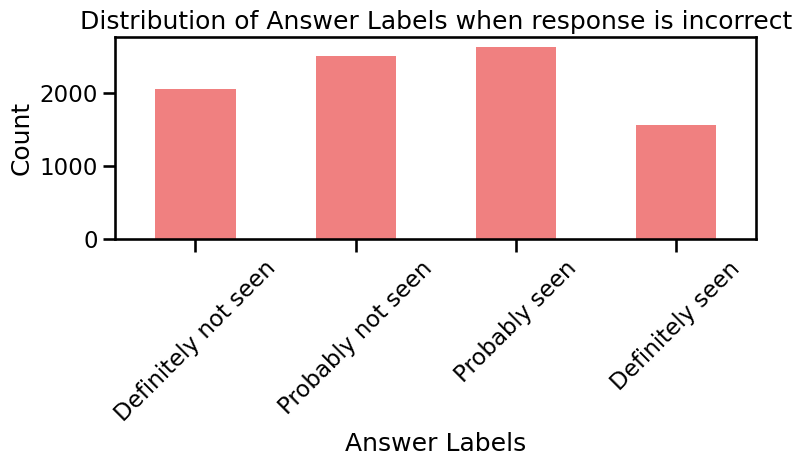

In [35]:
plt.figure(figsize=(8, 5))
answer_counts_incorr.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Answer Labels when response is incorrect')
plt.xlabel('Answer Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()



###for each of the categories plot the accuracy

In [36]:
# df = df[df['image_recall_response.rt'] <= 4]


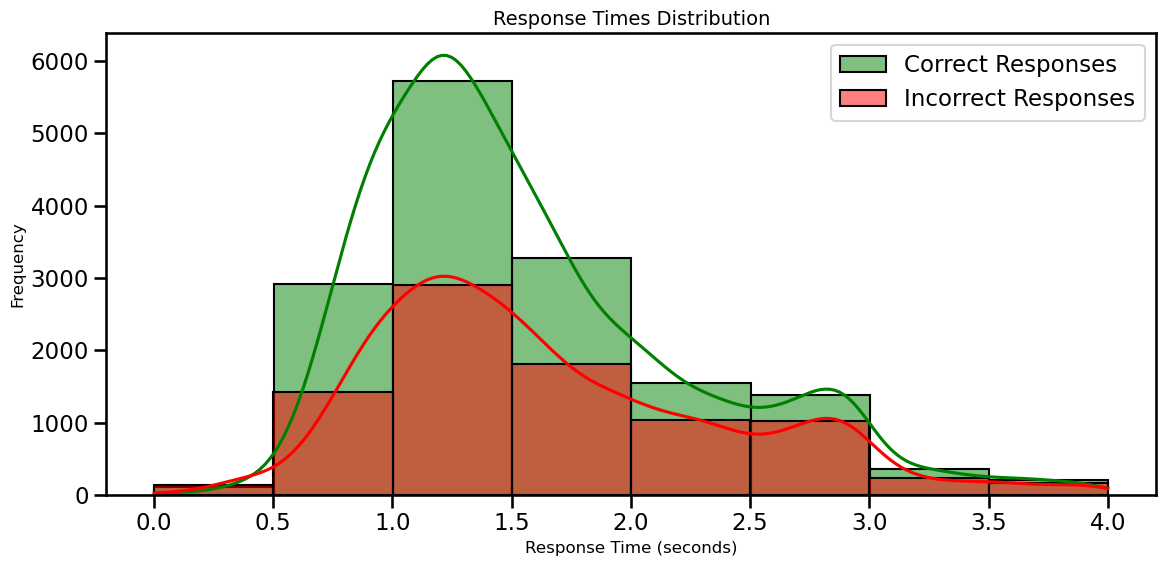

count    24290.000000
mean         1.606317
std          0.706682
min          0.000500
25%          1.094500
50%          1.427350
75%          1.988875
max          3.999800
Name: image_recall_response.rt, dtype: float64


In [37]:
df['recall_category'] = df['image_recall_response.keys'].map({
    1: 'Definitely not seen',
    2: 'Probably not seen',
    3: 'Probably seen',
    4: 'Definitely seen'
})

df['correct_recall'] = ((df['acc_recall'] == 1) & 
                              (df['Answer Labels'].isin(['Probably seen', 'Definitely seen']))) | \
                             ((df['acc_recall'] == 0) & 
                              (df['Answer Labels'].isin(['Definitely not seen', 'Probably not seen'])))



response_time_column = 'image_recall_response.rt'
correct_response_times = df[df['recall_answ'] == 1][response_time_column].dropna()
incorrect_response_times = df[df['recall_answ'] == 0][response_time_column].dropna()

# Get summary statistics for response times
response_time_stats = df[response_time_column].describe()

# Plotting the response times distribution
plt.figure(figsize=(12, 6))
sns.histplot(correct_response_times, color='green', kde=True, label='Correct Responses', binwidth=0.5)
sns.histplot(incorrect_response_times, color='red', kde=True, label='Incorrect Responses', binwidth=0.5)

plt.title('Response Times Distribution', fontsize=14)
plt.xlabel('Response Time (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Displaying summary statistics for response times
print(response_time_stats)


#####more fine graned bins

In [38]:
df['correct_recall']

1         True
2         True
3         True
4        False
5         True
         ...  
25585    False
25586    False
25587     True
25588     True
25592     True
Name: correct_recall, Length: 24290, dtype: bool

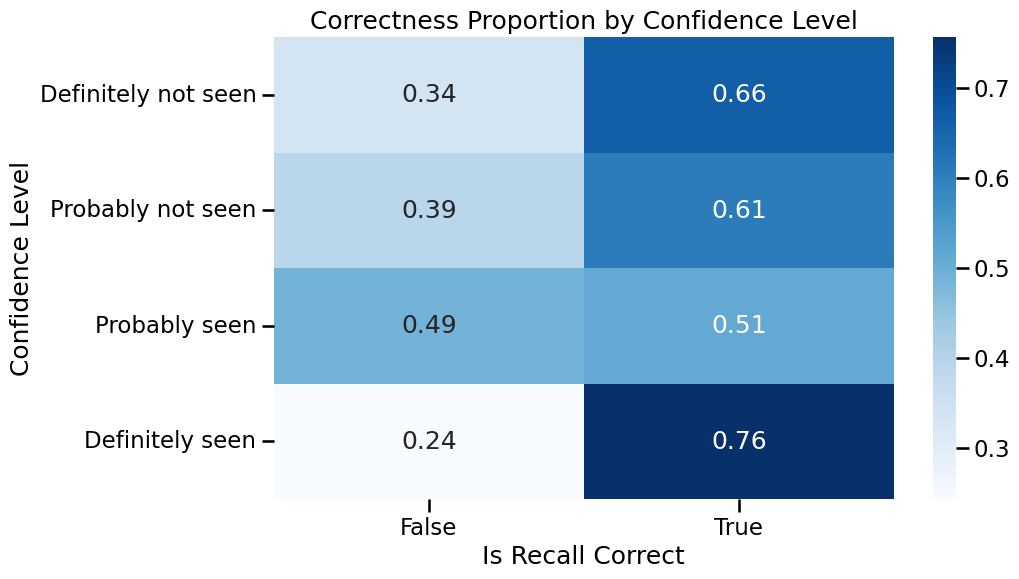

In [39]:
confidence_order = ['Definitely not seen', 'Probably not seen', 'Probably seen', 'Definitely seen']

confidence_mapping = {1: 'Definitely not seen', 2: 'Probably not seen', 
                                  3: 'Probably seen', 4: 'Definitely seen'}
df['confidence_level'] = df['image_recall_response.keys'].map(confidence_mapping)

confidence_correctness = pd.crosstab(df['confidence_level'], df['correct_recall'], normalize='index').reindex(index=confidence_order)

plt.figure(figsize=(10, 6))
sns.heatmap(confidence_correctness, annot=True, cmap='Blues')
plt.title('Correctness Proportion by Confidence Level')
plt.xlabel('Is Recall Correct')
plt.ylabel('Confidence Level')
plt.show()


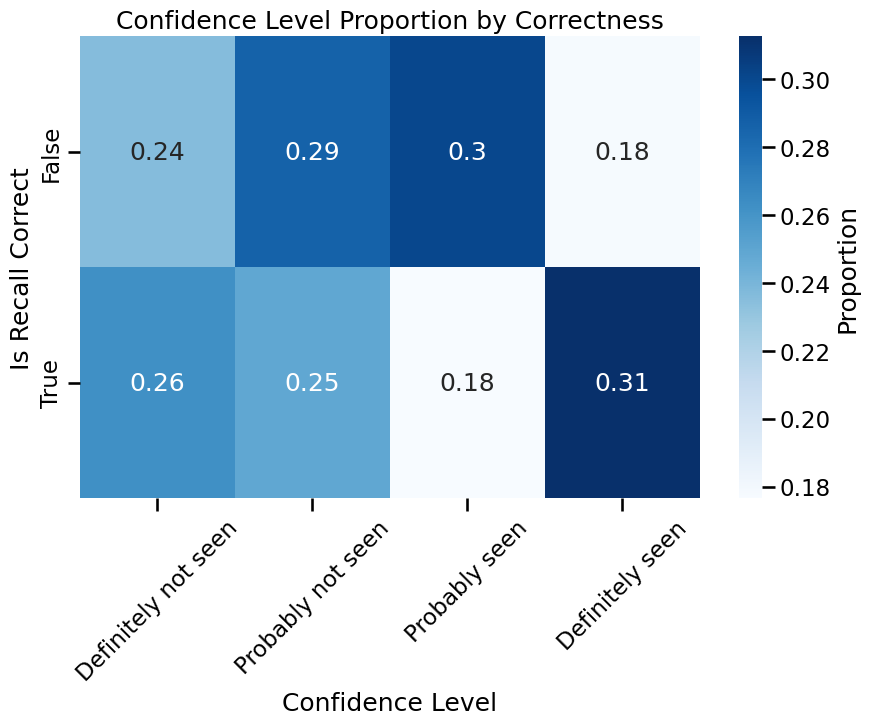

In [40]:
correctness_order = [False, True]  # Assuming 0 is 'not correct' and 1 is 'correct'

confidence_correctness_reversed = pd.crosstab(
    df['correct_recall'],
    df['confidence_level'],
    normalize='index'
).reindex(index=correctness_order, columns=confidence_order)

plt.figure(figsize=(10, 6))
sns.heatmap(confidence_correctness_reversed, annot=True, cmap='Blues', cbar_kws={'label': 'Proportion'})
plt.title('Confidence Level Proportion by Correctness')
plt.xlabel('Confidence Level')
plt.ylabel('Is Recall Correct')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

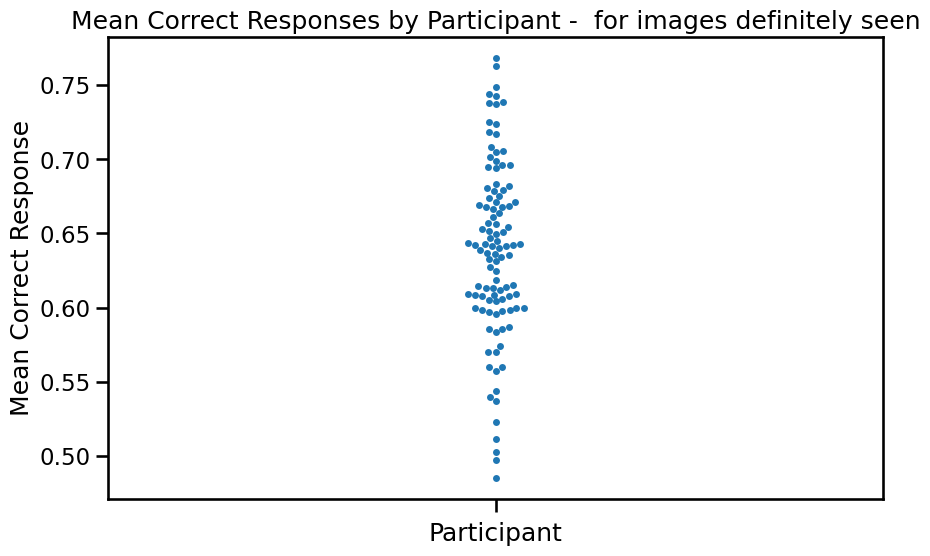

In [41]:
# Convert 'resp_correct' to numeric, coercing errors to NaN (non-numeric to NaN)
df['recall_answ'] = pd.to_numeric(df['recall_answ'], errors='coerce')

# Now, calculate the mean 'resp_correct' for each participant
mean_resp_correct = df.groupby('participant')['recall_answ'].mean().reset_index()

# Create the swarm plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
sns.swarmplot(y='recall_answ', data=mean_resp_correct)

plt.title('Mean Correct Responses by Participant -  for images definitely seen')
plt.xlabel('Participant')
plt.ylabel('Mean Correct Response')

# Show the plot
plt.show()

In [42]:
df

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,IT Distractor Similarity to Tested Item,v2_sim_dis_test_sq_z,it_sim_dis_test_sq_z,acc_recall,mem_answ,recall_answ,Answer Labels,recall_category,correct_recall,confidence_level
1,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,NaN,NaN,NaN,0,0.0,1.0,Definitely not seen,Definitely not seen,True,Definitely not seen
2,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,NaN,NaN,NaN,0,0.0,1.0,Probably not seen,Probably not seen,True,Probably not seen
3,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,NaN,NaN,NaN,1,1.0,1.0,Definitely seen,Definitely seen,True,Definitely seen
4,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,NaN,NaN,NaN,0,1.0,0.0,Probably seen,Probably seen,False,Probably seen
5,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,NaN,NaN,NaN,0,0.0,1.0,Probably not seen,Probably not seen,True,Probably not seen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25585,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,NaN,NaN,NaN,0,1.0,0.0,Definitely seen,Definitely seen,False,Definitely seen
25586,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,NaN,NaN,NaN,0,1.0,0.0,Probably seen,Probably seen,False,Probably seen
25587,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,NaN,NaN,NaN,1,1.0,1.0,Probably seen,Probably seen,True,Probably seen
25588,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,NaN,NaN,NaN,1,1.0,1.0,Probably seen,Probably seen,True,Probably seen


In [43]:
##acc_recall is 1 if the image was actually seen
##mem_answ is 1 if the said seen or probably seen
###recall_answ is 1 if these two are both 1 or both 0


### now I want, for the images where acc_recall == 1 to assign it, v2, etc
cols_to_copy = ['attend', 'reliability', 'validity', 'test_item']

# # Define the condition to match both `participant` and `ImagePath`
# condition = (df['acc_recall'] == 1) & (
#     ((df['participant'] == df_orig['participant']) & (df['ImagePath'] == df_orig['img1'])) |
#     ((df['participant'] == df_orig['participant']) & (df['ImagePath'] == df_orig['img2'])) |
#     ((df['participant'] == df_orig['participant']) & (df['ImagePath'] == df_orig['ping_im']))
# )

# # Apply the condition and copy values from `df_orig` to `df`
# df.loc[condition, cols_to_copy] = df_orig.loc[
#     ((df_orig['participant'] == df['participant']) & (df_orig['img1'] == df['ImagePath'])) |
#     ((df_orig['participant'] == df['participant']) & (df_orig['img2'] == df['ImagePath'])) |
#     ((df_orig['participant'] == df['participant']) & (df_orig['ping_im'] == df['ImagePath'])),
#     cols_to_copy
# ].values

In [44]:
df['participant']

1        165862
2        165862
3        165862
4        165862
5        165862
          ...  
25585    167431
25586    167431
25587    167431
25588    167431
25592    167431
Name: participant, Length: 24290, dtype: int64

In [45]:
df_orig['it_sim_dis_unattend']

0        0.308782
1        0.234033
2        0.468530
3        0.442743
4        0.108812
           ...   
32005    0.498161
32006    0.551524
32007    0.552167
32008   -0.333515
32009   -0.118476
Name: it_sim_dis_unattend, Length: 32010, dtype: float64

In [46]:
prc = []
for a in df['acc_recall']:
    if a == 1:
        prc.append('Correct')
    else:
        prc.append('Wrong')
df['Past Response Correctness'] = prc


In [47]:
df_orig['validity_binary']

0        1
1        1
2        1
3        1
4        1
        ..
32005    0
32006    1
32007    1
32008    0
32009    1
Name: validity_binary, Length: 32010, dtype: int64

In [48]:
def fill_non_nan_columns(row):
    # Locate matching rows in df_orig based on participant and image conditions
    matching_rows = df_orig[
        (df_orig['participant'] == row['participant']) &
        ((df_orig['img1'] == row['ImagePath']) | 
         (df_orig['img2'] == row['ImagePath']) | 
         (df_orig['ping_img'] == row['ImagePath']))
    ]
    
    # Copy non-NaN columns from the first matching row in df_orig if there's a match
    if not matching_rows.empty:
        match = matching_rows.iloc[0]
        for col in match.index:
            # Skip columns that identify rows (not to be copied over) and only copy non-NaN values
            if col not in ['participant'] and pd.notna(match[col]):
                row[col] = match[col]
    return row

# Apply the function to each row in df, only where 'acc_recall' == 1
df = df.apply(lambda row: fill_non_nan_columns(row) if row['acc_recall'] == 1 else row, axis=1)


In [49]:
# # Initialize an empty dataframe for df_ltm
# df_ltm = pd.DataFrame()

# def fill_non_nan_columns(row):
#     global df_ltm  # Use the global variable df_ltm
    
#     # Locate matching rows in df_orig based on participant and image conditions
#     matching_rows = df_orig[
#         (df_orig['participant'] == row['participant']) &
#         ((df_orig['img1'] == row['ImagePath']) | 
#          (df_orig['img2'] == row['ImagePath']) | 
#          (df_orig['ping_img'] == row['ImagePath']))
#     ]
    
# #     # Copy non-NaN columns from the first matching row in df_orig if there's a match
#     if not matching_rows.empty:
#         match = matching_rows.iloc[0]
# #         for col in match.index:
# #             # Skip columns that identify rows (not to be copied over) and only copy non-NaN values
# #             if col not in ['participant'] and pd.notna(match[col]):
# #                 row[col] = match[col]
        
#         # Add the matching row to df_ltm and create an additional column
#         matching_row = match.copy()
#         matching_row['image_recall_response.keys'] = row['image_recall_response.keys']  # Replace 'some_value' with the desired logic
#         matching_row['acc_recall'] = row['acc_recall']  # Replace 'some_value' with the desired logic
#         matching_row['recall_answ'] = row['recall_answ']  # Replace 'some_value' with the desired logic
#         matching_row['mem_answ'] = row['mem_answ']  # Replace 'some_value' with the desired logic
#         matching_row['Answer Labels'] = row['Answer Labels']  # Replace 'some_value' with the desired logic
#         df_ltm = pd.concat([df_ltm, matching_row.to_frame().T], ignore_index=True)
#     'Answer Labels'
#     return row

# # Apply the function to each row in df, only where 'acc_recall' == 1
# df = df.apply(lambda row: fill_non_nan_columns(row) if row['acc_recall'] == 1 else row, axis=1)


In [50]:
# df_ltm.to_csv("df_ltm.csv", index=False)


In [51]:
df['validity_binary']

1        NaN
2        NaN
3        1.0
4        NaN
5        NaN
        ... 
25585    NaN
25586    NaN
25587    1.0
25588    0.0
25592    0.0
Name: validity_binary, Length: 24290, dtype: float64

In [52]:
def remove_unit_variance(df, col, unit, group=None, suffix="_within"):
    """Remove variance between sampling units.

    This is useful for plotting repeated-measures data using within-unit
    error bars.

    Parameters
    ----------
    df : DataFrame
        Input data. Will have a new column added.
    col : column name
        Column in dataframe with quantitative measure to modify.
    unit : column name
        Column in dataframe defining sampling units (e.g., subjects).
    group : column name(s), optional
        Columns defining groups to remove unit variance within.
    suffix : string, optional
        Suffix appended to ``col`` name to create new column.

    Returns
    -------
    df : DataFrame
        Returns modified dataframe.

    """
    new_col = col + suffix

    def demean(x):
        return x - x.mean()

    if group is None:
        new = df.groupby(unit)[col].transform(demean)
        new += df[col].mean()
        df.loc[:, new_col] = new
    else:
        df.loc[:, new_col] = np.nan
        for level, df_level in df.groupby(group):
            new = df_level.groupby(unit)[col].transform(demean)
            new += df_level[col].mean()
            df.loc[new.index, new_col] = new

    return df

In [53]:
df = remove_unit_variance(df,'mouse.time_last','participant')
df['analysis_rt'] = df['mouse.time_last_within']

In [54]:
palette = sns.color_palette("husl", n_colors=2)[::-1]  # Reverse the color order


In [55]:
df['Distractor V2 Similarity Preference'] = df['v2_prefers'] 
df['Distractor IT Similarity Preference'] = df['it_prefers']

column_params = {
    'v2': {'n_cats': 5, 'labels': ['Least Similar', '', ' ', '   ', 'Most Similar']},
    'it': {'n_cats': 5, 'labels': ['Least Similar', '', ' ', '   ', 'Most Similar']}
}

for label in ['it_sim_dis_attend', 'v2_sim_dis_attend', 'it_sim_dis_unattend', 'v2_sim_dis_unattend', 'it_sim_dis_diff', 'v2_sim_dis_diff', 'it_im1_im2', 'v2_im1_im2', 'it_sim_dis_test', 'v2_sim_dis_test', 'it_sim_dis_untest', 'v2_sim_dis_untest', 'it_sim_dis_diff_test', 'v2_sim_dis_diff_test', 'v2_sim_dis_diff_sq', 'it_sim_dis_diff_sq', 'v2_sim_dis_diff_test_sq','it_sim_dis_diff_test_sq']:
    
    if 'v2' in label:
        n_cats = column_params['v2']['n_cats']
        labels = column_params['v2']['labels']
    else:
        n_cats = column_params['it']['n_cats']
        labels = column_params['it']['labels']
    
    df[label + '_cat'] = pd.qcut(df[label], q=n_cats, labels=labels, duplicates='drop')


df['V2 Distractor Similarity\nto Prioritized Item'] = df['v2_sim_dis_attend_cat']
df['IT Distractor Similarity\nto Prioritized Item'] = df['it_sim_dis_attend_cat']
df['V2 Distractor Similarity\nto Deprioritized Item'] = df['v2_sim_dis_unattend_cat']
df['IT Distractor Similarity\nto Deprioritized Item'] = df['it_sim_dis_unattend_cat']
df['Prioritized - Deprioritized IT Distractor Similarity'] = df['it_sim_dis_diff_cat'] 
df['Prioritized - Deprioritized V2 Distractor Similarity'] = df['v2_sim_dis_diff_cat'] 
df['Prioritized - Deprioritized IT Distractor Similarity Squared'] = df['v2_sim_dis_diff_sq_cat'] 
df['Prioritized - Deprioritized V2 Distractor Similarity Squared'] = df['it_sim_dis_diff_sq_cat'] 


df['V2 Distractor Similarity\nto Tested Item'] = df['v2_sim_dis_test_cat']
df['IT Distractor Similarity\nto Tested Item'] = df['it_sim_dis_test_cat']
df['V2 Distractor Similarity\nto Untested Item'] = df['v2_sim_dis_untest_cat']
df['IT Distractor Similarity\nto Untested Item'] = df['it_sim_dis_untest_cat']
df['Tested - Untested IT Distractor Similarity'] = df['it_sim_dis_diff_test_cat'] 
df['Tested - Untested V2 Distractor Similarity'] = df['v2_sim_dis_diff_test_cat'] 
df['Tested - Untested IT Distractor Similarity Squared'] = df['v2_sim_dis_diff_test_sq_cat'] 
df['Tested - Untested V2 Distractor Similarity Squared'] = df['it_sim_dis_diff_test_sq_cat'] 


In [56]:
df['tested_item'] = df['Tested Item']
df['ret_rel'] = df['Retrocue Reliability']

In [57]:
# df_correct = df[df['resp_correct'] == 1]


In [58]:
df['it_sim_dis_diff'] = df['it_sim_dis_diff'] - np.mean(df['it_sim_dis_diff'])
df['v2_sim_dis_diff'] = df['v2_sim_dis_diff'] - np.mean(df['v2_sim_dis_diff'])

df['it_sim_dis_diff_test'] = df['it_sim_dis_diff_test'] - np.mean(df['it_sim_dis_diff_test'])
df['v2_sim_dis_diff_test'] = df['v2_sim_dis_diff_test'] - np.mean(df['v2_sim_dis_diff_test'])

df['it_sim_dis_diff_test_sq'] = [x**2 for x in df['it_sim_dis_diff_test']]
df['v2_sim_dis_diff_test_sq'] = [x**2 for x in df['v2_sim_dis_diff_test']]

df['it_sim_dis_diff_sq'] = [x**2 for x in df['it_sim_dis_diff']]
df['v2_sim_dis_diff_sq'] = [x**2 for x in df['v2_sim_dis_diff']]


df['it_sim_dis_diff_sq'] = df['it_sim_dis_diff_sq'] - np.mean(df['it_sim_dis_diff_sq'])
df['v2_sim_dis_diff_sq'] = df['v2_sim_dis_diff_sq'] - np.mean(df['v2_sim_dis_diff_sq'])

df['it_sim_dis_diff_test_sq'] = df['it_sim_dis_diff_test_sq'] - np.mean(df['it_sim_dis_diff_test_sq'])
df['v2_sim_dis_diff_test_sq'] = df['v2_sim_dis_diff_test_sq'] - np.mean(df['v2_sim_dis_diff_test_sq'])


df['IT_diff_binned'] = pd.qcut(df['it_sim_dis_diff'], 5, duplicates='drop')
df['V2_diff_binned'] = pd.qcut(df['v2_sim_dis_diff'], 5, duplicates='drop')
df['IT_diff_binned_sq'] = pd.qcut(df['it_sim_dis_diff_sq'], 5, duplicates='drop')
df['V2_diff_binned_sq'] = pd.qcut(df['v2_sim_dis_diff_sq'], 5, duplicates='drop')


df['IT_diff_binned_test'] = pd.qcut(df['it_sim_dis_diff_test'], 5, duplicates='drop')
df['V2_diff_binned_test'] = pd.qcut(df['v2_sim_dis_diff_test'], 5, duplicates='drop')
df['IT_diff_binned_test_sq'] = pd.qcut(df['it_sim_dis_diff_test_sq'], 5, duplicates='drop')
df['V2_diff_binned_test_sq'] = pd.qcut(df['v2_sim_dis_diff_test_sq'], 5, duplicates='drop')

def round_to_significant_figures(x, sig_figs=2):
    if x == 0:
        return 0
    else:
        return round(x, sig_figs - int(np.floor(np.log10(abs(x)))) - 1)


def process_interval(interval):
    # Round both bounds
    lower_rounded = round_to_significant_figures(interval.left)
    upper_rounded = round_to_significant_figures(interval.right)
    # Return a new interval with the rounded bounds
    return pd.Interval(lower_rounded, upper_rounded)

df['IT_diff_binned'] = df['IT_diff_binned'].apply(process_interval)
df['V2_diff_binned'] = df['V2_diff_binned'].apply(process_interval)
df['IT_diff_binned_sq'] = df['IT_diff_binned_sq'].apply(process_interval)
df['V2_diff_binned_sq'] = df['V2_diff_binned_sq'].apply(process_interval)

df['IT_diff_binned_test'] = df['IT_diff_binned_test'].apply(process_interval)
df['V2_diff_binned_test'] = df['V2_diff_binned_test'].apply(process_interval)
df['IT_diff_binned_test_sq'] = df['IT_diff_binned_test_sq'].apply(process_interval)
df['V2_diff_binned_test_sq'] = df['V2_diff_binned_test_sq'].apply(process_interval)

df['Prioritized - Deprioritized V2 Distractor Similarity Ranges'] = df['V2_diff_binned']
df['Prioritized - Deprioritized IT Distractor Similarity Ranges'] = df['IT_diff_binned']
df['Prioritized - Deprioritized V2 Distractor Similarity Squared Ranges'] = df['V2_diff_binned_sq']
df['Prioritized - Deprioritized IT Distractor Similarity Squared Ranges'] = df['IT_diff_binned_sq']

df['Tested - Untested V2 Distractor Similarity Ranges'] = df['V2_diff_binned_test']
df['Tested - Untested IT Distractor Similarity Ranges'] = df['IT_diff_binned_test']
df['Tested - Untested V2 Distractor Similarity Squared Ranges'] = df['V2_diff_binned_test_sq']
df['Tested - Untested IT Distractor Similarity Squared Ranges'] = df['IT_diff_binned_test_sq']

In [59]:
df['V2 Distractor Similarity to Tested Item'] = df['v2_sim_dis_test_z']
df['IT Distractor Similarity to Tested Item'] = df['it_sim_dis_test_z']
df['Tested - Untested V2 Distractor Similarity'] = df['v2_sim_dis_diff_test_z']
df['Tested - Untested IT Distractor Similarity'] = df['it_sim_dis_diff_test_z']


# df['V2 Distractor Similarity to LTM Item'] = df['v2_sim_dis_test_z']
# df['IT Distractor Similarity to LTM Item'] = df['it_sim_dis_test_z']
# df['LTM - NonLTM V2 Distractor Similarity'] = df['v2_sim_dis_diff_test_z']
# df['LTM - NonLTM IT Distractor Similarity'] = df['it_sim_dis_diff_test_z']

In [60]:
# Add a new column 'category' to df with all conditions
df['category'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img']
    else ('foil' if 'foil' in str(row['ImagePath']).lower()
          else ('tested' if ((row['ImagePath'] == row['img1'] and row['test_item'] == 'img1') or 
                             (row['ImagePath'] == row['img2'] and row['test_item'] == 'img2'))
                else 'not tested')),
    axis=1
)


In [61]:
# df_filtered['category']

In [62]:
df['mem_stim_type'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img']
    else  (('tested' if ((row['ImagePath'] == row['img1'] and row['test_item'] == 'img1') or 
                             (row['ImagePath'] == row['img2'] and row['test_item'] == 'img2'))
                else 'not tested')),
    axis=1
)


In [63]:
df['Tested'] = df['mem_stim_type']

In [64]:
df['Attend'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img']
    else 'foil' if (row['category']== 'foil')
    else 'attended' if ((row['ImagePath'] == row['img1'] and row['attend'] == 'img1') or 
                             (row['ImagePath'] == row['img2'] and row['attend'] == 'img2'))
    else 'not attended',
    axis=1
)

In [65]:
def calculate_ltm_reliability(row):
    if (row['category']== 'foil'):
        return 'foil'
    elif row['reliability'] > 0.7:
        return 'high'
    elif row['reliability'] < 0.7:
        return 'low'
    
    else:
        return None  # Optional: Default case, if needed

# Apply the function to the dataframe
df['Reliability'] = df.apply(calculate_ltm_reliability, axis=1)


In [66]:
df_distractor = df[df['category'] == 'distractor']

In [67]:
df_distractor

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,Answer Labels,recall_category,correct_recall,confidence_level,Past Response Correctness,category,mem_stim_type,Tested,Attend,Reliability
6,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,Definitely seen,Definitely seen,True,Definitely seen,Correct,distractor,distractor,distractor,distractor,high
7,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,Definitely seen,Definitely seen,True,Definitely seen,Correct,distractor,distractor,distractor,distractor,low
9,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,Probably seen,Probably seen,True,Probably seen,Correct,distractor,distractor,distractor,distractor,low
13,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,Definitely seen,Definitely seen,True,Definitely seen,Correct,distractor,distractor,distractor,distractor,low
14,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,Probably seen,Probably seen,True,Probably seen,Correct,distractor,distractor,distractor,distractor,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25569,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,Definitely seen,Definitely seen,True,Definitely seen,Correct,distractor,distractor,distractor,distractor,high
25576,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,Definitely not seen,Definitely not seen,False,Definitely not seen,Correct,distractor,distractor,distractor,distractor,low
25581,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,Definitely not seen,Definitely not seen,False,Definitely not seen,Correct,distractor,distractor,distractor,distractor,low
25582,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,Definitely not seen,Definitely not seen,False,Definitely not seen,Correct,distractor,distractor,distractor,distractor,low


In [68]:
df_filtered = df[(df['category'] == 'tested') | (df['category'] == 'not tested')]


In [69]:
df_filtered['Tested Item'] #just wm testedness

3          prioritized
10         prioritized
16         prioritized
18       deprioritized
26         prioritized
             ...      
25575      prioritized
25578    deprioritized
25580      prioritized
25588    deprioritized
25592    deprioritized
Name: Tested Item, Length: 8246, dtype: object

In [70]:
df_filtered['Attend'] # if ltm was attended in wm

3        not attended
10       not attended
16           attended
18       not attended
26       not attended
             ...     
25575    not attended
25578        attended
25580        attended
25588    not attended
25592    not attended
Name: Attend, Length: 8246, dtype: object

In [71]:
df_filtered['Tested'] # if ltm was tested in wm

3        not tested
10       not tested
16           tested
18           tested
26       not tested
            ...    
25575    not tested
25578    not tested
25580        tested
25588        tested
25592        tested
Name: Tested, Length: 8246, dtype: object

In [72]:
#if ltm item was not tested in wm we need to update it and v2
#'V2 Distractor Similarity to LTM Item'
#'IT Distractor Similarity to LTM Item'
#'LTM - NonLTM V2 Distractor Similarity'
#'LTM - NonLTM IT Distractor Similarity'


In [88]:
df_nan = df_filtered[pd.isna(df_filtered['img1'])]
df_nan

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,Past Response Correctness,category,mem_stim_type,Tested,Attend,Reliability,it_ltm,v2_ltm,it_ltm_diff,v2_ltm_diff
22730,NaN,NaN,160456,2024-11-25_17h11.14.474,WM_Deepgen,2023.2.1,MacIntel,107.526882,NaN,NaN,...,Correct,not tested,not tested,not tested,not attended,None,not tested,not tested,NaN,not tested
22734,NaN,NaN,160456,2024-11-25_17h11.14.474,WM_Deepgen,2023.2.1,MacIntel,107.526882,NaN,NaN,...,Correct,not tested,not tested,not tested,not attended,None,not tested,not tested,NaN,not tested
22744,NaN,NaN,160456,2024-11-25_17h11.14.474,WM_Deepgen,2023.2.1,MacIntel,107.526882,NaN,NaN,...,Correct,not tested,not tested,not tested,not attended,None,not tested,not tested,NaN,not tested
22756,NaN,NaN,160456,2024-11-25_17h11.14.474,WM_Deepgen,2023.2.1,MacIntel,107.526882,NaN,NaN,...,Correct,not tested,not tested,not tested,not attended,None,not tested,not tested,NaN,not tested
22769,NaN,NaN,160456,2024-11-25_17h11.14.474,WM_Deepgen,2023.2.1,MacIntel,107.526882,NaN,NaN,...,Correct,not tested,not tested,not tested,not attended,None,not tested,not tested,NaN,not tested
22784,NaN,NaN,160456,2024-11-25_17h11.14.474,WM_Deepgen,2023.2.1,MacIntel,107.526882,NaN,NaN,...,Correct,not tested,not tested,not tested,not attended,None,not tested,not tested,NaN,not tested
22799,NaN,NaN,160456,2024-11-25_17h11.14.474,WM_Deepgen,2023.2.1,MacIntel,107.526882,NaN,NaN,...,Correct,not tested,not tested,not tested,not attended,None,not tested,not tested,NaN,not tested
22803,NaN,NaN,160456,2024-11-25_17h11.14.474,WM_Deepgen,2023.2.1,MacIntel,107.526882,NaN,NaN,...,Correct,not tested,not tested,not tested,not attended,None,not tested,not tested,NaN,not tested
22807,NaN,NaN,160456,2024-11-25_17h11.14.474,WM_Deepgen,2023.2.1,MacIntel,107.526882,NaN,NaN,...,Correct,not tested,not tested,not tested,not attended,None,not tested,not tested,NaN,not tested
22827,NaN,NaN,160456,2024-11-25_17h11.14.474,WM_Deepgen,2023.2.1,MacIntel,107.526882,NaN,NaN,...,Correct,not tested,not tested,not tested,not attended,None,not tested,not tested,NaN,not tested


In [74]:
# if df_filtered['Tested'] == 'not tested':
#     df_filtered['it_sim_dis_test'] = np.where(df_filtered['test_item'] == 'img1', df_filtered['IT_root_im1'], dataframe['IT_root_im2'])
#     df_filtered['v2_sim_dis_test'] = np.where(df_filtered['test_item'] == 'img1', df_filtered['V2_root_im1'], dataframe['V2_root_im2'])

    
    
df_filtered['it_ltm'] = df_filtered.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img'] else (
        row['IT_root_im1'] if (row['ImagePath'] == row['img1']) else (
            row['IT_root_im2'] if (row['ImagePath'] == row['img2'] ) else 
            'not tested'
        )
    ),
    axis=1
)
    
df_filtered['v2_ltm'] = df_filtered.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img'] else (
        row['V2_root_im1'] if (row['ImagePath'] == row['img1']) else (
            row['V2_root_im2'] if (row['ImagePath'] == row['img2'] ) else 
            'not tested'
        )
    ),
    axis=1
)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22623/3728465708.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['it_ltm'] = df_filtered.apply(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22623/3728465708.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['v2_ltm'] = df_filtered.apply(


In [81]:
    
df_filtered['it_ltm_diff'] = df_filtered.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img'] else (
        (row['IT_root_im1'] - row['IT_root_im2']) if (row['ImagePath'] == row['img1']) else (
        (row['IT_root_im2'] - row['IT_root_im1']) if (row['ImagePath'] == row['img2'] ) else
            print(row['ImagePath'], row['img1'], row['img2'], row['ping_img'])
            
        )
    ),
    axis=1
)

    
df_filtered['v2_ltm_diff'] = df_filtered.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img'] else (
        (row['V2_root_im1'] - row['V2_root_im2']) if (row['ImagePath'] == row['img1']) else (
        (row['V2_root_im2'] - row['V2_root_im1']) if (row['ImagePath'] == row['img2'] ) else 
            'not tested'
        )
    ),
    axis=1
)




./stimuli/213_3.jpg nan nan nan
./stimuli/13_1.jpg nan nan nan
./stimuli/121_2.jpg nan nan nan
./stimuli/1_3.jpg nan nan nan
./stimuli/157_2.jpg nan nan nan
./stimuli/293_3.jpg nan nan nan
./stimuli/257_3.jpg nan nan nan
./stimuli/173_1.jpg nan nan nan
./stimuli/139_1.jpg nan nan nan
./stimuli/258_1.jpg nan nan nan
./stimuli/215_2.jpg nan nan nan
./stimuli/85_2.jpg nan nan nan
./stimuli/31_3.jpg nan nan nan
./stimuli/225_2.jpg nan nan nan
./stimuli/175_3.jpg nan nan nan
./stimuli/35_1.jpg nan nan nan
./stimuli/281_3.jpg nan nan nan
./stimuli/289_1.jpg nan nan nan
./stimuli/43_1.jpg nan nan nan
./stimuli/238_2.jpg nan nan nan
./stimuli/26_2.jpg nan nan nan
./stimuli/125_1.jpg nan nan nan
./stimuli/273_1.jpg nan nan nan


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22623/3081043081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['it_ltm_diff'] = df_filtered.apply(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22623/3081043081.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['v2_ltm_diff'] = df_filtered.apply(


In [76]:
column_params = {
    'v2': {'n_cats': 5, 'labels': ['Least Similar', '', ' ', '   ', 'Most Similar']},
    'it': {'n_cats': 5, 'labels': ['Least Similar', '', ' ', '   ', 'Most Similar']}
}

for label in ['it_ltm', 'v2_ltm', 'it_ltm_diff', 'v2_ltm_diff']:
    
    if 'v2' in label:
        n_cats = column_params['v2']['n_cats']
        labels = column_params['v2']['labels']
    else:
        n_cats = column_params['it']['n_cats']
        labels = column_params['it']['labels']
    
    df_filtered[label + '_cat'] = pd.qcut(df_filtered[label], q=n_cats, labels=labels, duplicates='drop')


df_filtered['V2 Distractor Similarity\nto LTM Item'] = df_filtered['v2_ltm_cat']
df_filtered['IT Distractor Similarity\nto LTM Item'] = df_filtered['it_ltm_cat']
df_filtered['LTM - NonLTM V2 Distractor Similarity Ranges'] =df_filtered['v2_ltm_diff_cat']
df_filtered['LTM - NonLTM IT Distractor Similarity Ranges'] =df_filtered['it_ltm_diff_cat']



df_filtered['v2_ltm'] = df_filtered['v2_ltm'] - np.mean(df_filtered['v2_ltm'])
df_filtered['it_ltm'] = df_filtered['it_ltm'] - np.mean(df_filtered['it_ltm'])
df_filtered['v2_ltm_diff'] = df_filtered['v2_ltm_diff'] - np.mean(df_filtered['v2_ltm_diff'])
df_filtered['it_ltm_diff'] = df_filtered['it_ltm_diff'] - np.mean(df_filtered['it_ltm_diff'])



df_filtered['v2_ltm_sq'] = [x**2 for x in df_filtered['v2_ltm']]
df_filtered['it_ltm_sq'] = [x**2 for x in df_filtered['it_ltm']]
df_filtered['v2_ltm_diff_sq'] = [x**2 for x in df_filtered['v2_ltm_diff']]
df_filtered['it_ltm_diff_sq'] = [x**2 for x in df_filtered['it_ltm_diff']]

df_filtered['v2_ltm_sq'] = df_filtered['v2_ltm_sq'] - np.mean(df_filtered['v2_ltm_sq'])
df_filtered['it_ltm_sq'] = df_filtered['it_ltm_sq'] - np.mean(df_filtered['it_ltm_sq'])
df_filtered['v2_ltm_diff_sq'] = df_filtered['v2_ltm_diff_sq'] - np.mean(df_filtered['v2_ltm_diff_sq'])
df_filtered['it_ltm_diff_sq'] = df_filtered['it_ltm_diff_sq'] - np.mean(df_filtered['it_ltm_diff_sq'])

scaler = StandardScaler()

df_filtered['v2_ltm_z'] = scaler.fit_transform(df_filtered[['v2_ltm']])
df_filtered['it_ltm_z'] = scaler.fit_transform(df_filtered[['it_ltm']])
df_filtered['v2_ltm_diff_z'] = scaler.fit_transform(df_filtered[['v2_ltm_diff']])
df_filtered['it_ltm_diff_z'] = scaler.fit_transform(df_filtered[['it_ltm_diff']])
df_filtered['v2_ltm_sq_z'] = scaler.fit_transform(df_filtered[['v2_ltm_sq']])
df_filtered['it_ltm_sq_z'] = scaler.fit_transform(df_filtered[['it_ltm_sq']])
df_filtered['v2_ltm_diff_sq_z'] = scaler.fit_transform(df_filtered[['v2_ltm_diff_sq']])
df_filtered['it_ltm_diff_sq_z'] = scaler.fit_transform(df_filtered[['it_ltm_diff_sq']])

# df['v2_ltm'] = df['v2_ltm'] - np.mean(df['v2_ltm'])
# df['it_ltm'] = df['it_ltm'] - np.mean(df['it_ltm'])
# df['v2_ltm_diff'] = df['v2_ltm_diff'] - np.mean(df['v2_ltm_diff'])
# df['it_ltm_diff'] = df['it_ltm_diff'] - np.mean(df['it_ltm_diff'])




TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [78]:
print(df_filtered[label].unique())


[0.328808836 0.722795282 -0.103767157 -0.292355237 0.162845676
 -0.044378402 0.564382481 -0.259613829 0.105832307 0.160954225 0.079966337
 -0.299847713 -0.122174537 0.460828042 0.692946153 0.365817306
 -0.020887528 0.472162471 0.669948381 0.309748307 -0.120310538 0.593502809
 0.427021766 0.100063679 0.926320302 -0.359700594 -0.070916541 0.391971673
 0.789672752 -0.150998087 0.214471429 0.347008079 -0.144403509
 -0.203719459 -0.267323107 0.403651218 -0.219791724 -0.353059879
 0.540086239 0.202636819 0.504681728 -0.299987205 0.609724233 0.884451315
 -0.027331404 -0.300601374 0.117760054 0.616993081 -0.205910883
 0.573845807 -0.272876826 -0.29084191 0.401735675 -0.376523776 -0.07999697
 0.854325721 0.466234613 -0.240578046 -0.506964181 0.775831713 0.218777626
 -0.370080915 0.616691532 0.835584557 -0.229870193 0.511120285 0.228298113
 0.277467951 -0.048094044 -0.18963239 0.672751223 0.333119589 -0.27948458
 0.594228765 -0.229803061 0.611091982 -0.300251235 0.461496442
 -0.346720384 -0.5032

In [77]:
df_filtered['LTM - NonLTM V2 Distractor Similarity'] = df_filtered['v2_ltm_diff_z']
df_filtered['LTM - NonLTM IT Distractor Similarity'] = df_filtered['it_ltm_diff_z']

KeyError: 'v2_ltm_diff_z'

In [78]:
df_filtered['it_ltm_diff_sq_z']

0        0.226208
2        1.119323
16      -1.151323
19       1.204486
20      -1.160725
           ...   
32322    1.804502
32336    1.785169
32337   -1.147950
32354    0.282847
32360   -0.205779
Name: it_ltm_diff_sq_z, Length: 9724, dtype: float64

In [79]:
df_filtered['V2_root_im2']

0        0.210374
2        0.091650
16       0.069361
19       0.044260
20       0.039192
           ...   
32322    0.131313
32336    0.089459
32337    0.207113
32354    0.165054
32360    0.175802
Name: V2_root_im2, Length: 9724, dtype: float64

In [80]:
df_filtered['v2_ltm']

0        0.112078
2       -0.025382
16      -0.028935
19      -0.054036
20       0.019189
           ...   
32322    0.033017
32336    0.039263
32337    0.108817
32354    0.066758
32360   -0.045103
Name: v2_ltm, Length: 9724, dtype: float64

In [81]:
df_distractor = df[df['category'] == 'distractor']


In [82]:
palette = sns.color_palette("husl", n_colors=2)[::-1]  # Reverse the color order


In [83]:
df_filtered['V2 Distractor Similarity\nto Tested Item']

0        Most Similar
2                    
16       Most Similar
19                   
20                   
             ...     
32322                
32336                
32337                
32354                
32360    Most Similar
Name: V2 Distractor Similarity\nto Tested Item, Length: 9724, dtype: category
Categories (5, object): ['Least Similar' < '' < ' ' < '   ' < 'Most Similar']

In [84]:
df_filtered['V2 Distractor Similarity\nto LTM Item']

0        Most Similar
2                    
16                   
19                   
20                   
             ...     
32322                
32336                
32337    Most Similar
32354    Most Similar
32360                
Name: V2 Distractor Similarity\nto LTM Item, Length: 9724, dtype: category
Categories (5, object): ['Least Similar' < '' < ' ' < '   ' < 'Most Similar']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/3175656336.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(96.08554487179485, 0.5, 'Accuracy')

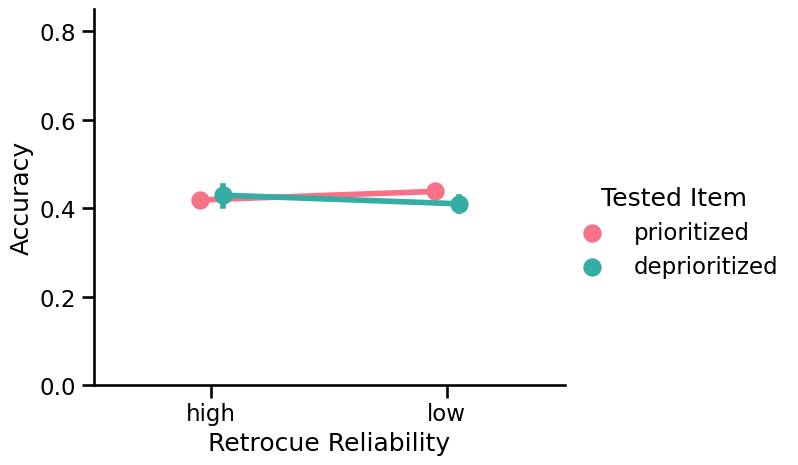

In [85]:
g = sns.catplot(
            x = 'Retrocue Reliability',
            y = 'recall_answ',
            ci = 68,
            hue = 'Tested Item',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
            palette = palette[::-1],  # Reverse the color order
            data = df_distractor)
g.set(ylim=(0, 0.85))
plt.ylabel('Accuracy')

In [86]:
# g = sns.catplot(
#             x = 'Retrocue Reliability',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             col = 'Attend',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_distractor)
# g.set(ylim=(0, 0.85))
# plt.ylabel('Accuracy')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/3636024404.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(681.5937500000001, 0.5, 'Accuracy')

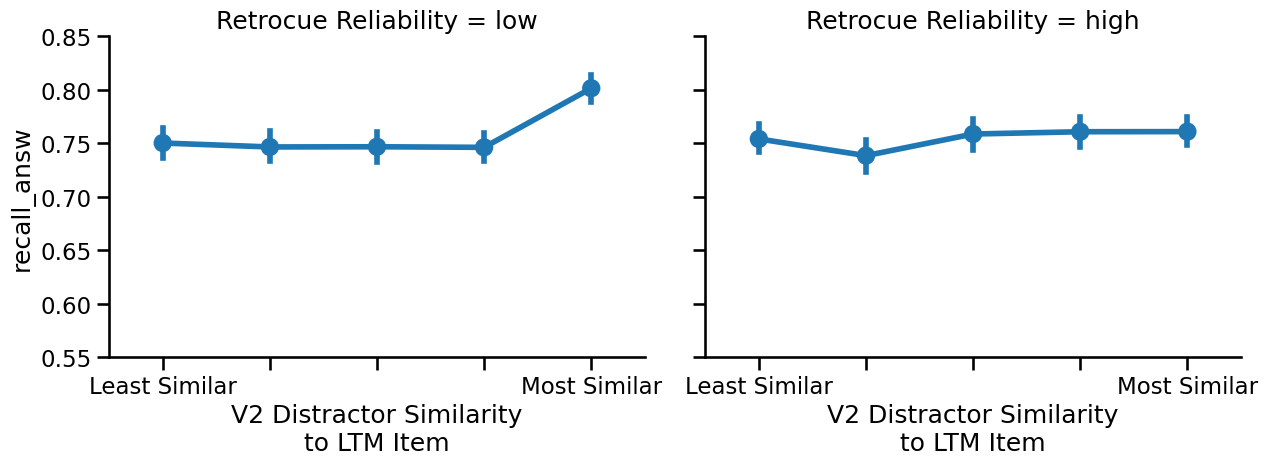

In [87]:
g = sns.catplot(
            x = 'V2 Distractor Similarity\nto LTM Item',
            y = 'recall_answ',
            ci = 68,
#             hue = 'Tested Item',
            col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
            data = df_filtered)
g.set(ylim=(0.55, 0.85))
plt.ylabel('Accuracy')



/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/1389117659.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(6.819444444444445, 0.5, 'Accuracy')

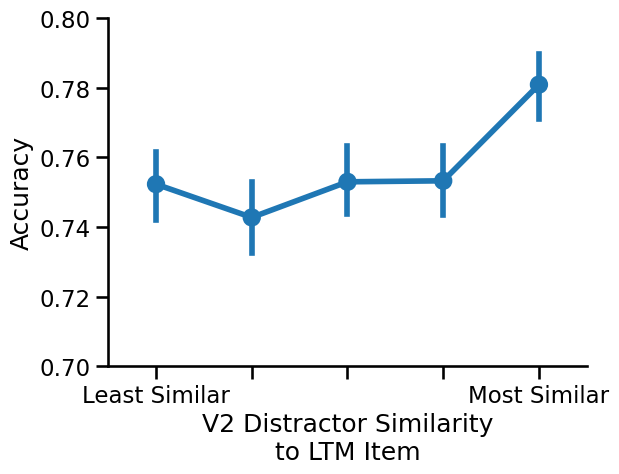

In [88]:
g = sns.catplot(
            x = 'V2 Distractor Similarity\nto LTM Item',
            y = 'recall_answ',
            ci = 68,
#             hue = 'Attend',
#             col = 'Tested',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
            data = df_filtered)
g.set(ylim=(0.7, 0.8))
plt.ylabel('Accuracy')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/163357802.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(6.819444444444445, 0.5, 'Accuracy')

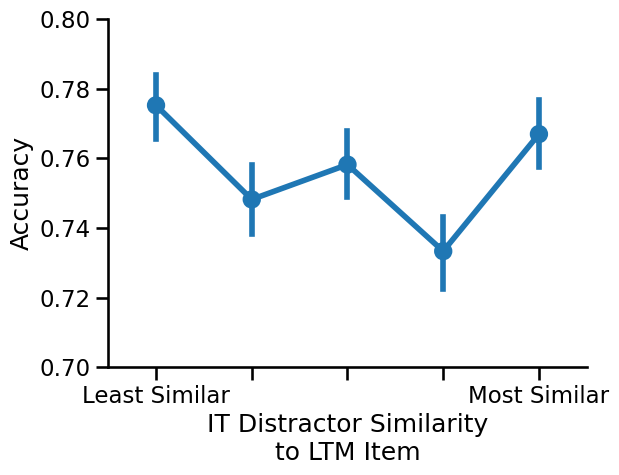

In [89]:
g = sns.catplot(
            x = 'IT Distractor Similarity\nto LTM Item',
            y = 'recall_answ',
            ci = 68,
#             hue = 'Attend',
#             col = 'Tested',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
            data = df_filtered)
g.set(ylim=(0.7, 0.8))
plt.ylabel('Accuracy')

In [90]:
df_filtered['V2 Distractor Similarity to LTM Item'] = df_filtered['v2_ltm_z']
df_filtered['IT Distractor Similarity to LTM Item'] = df_filtered['it_ltm_z']

df_filtered['V2 Distractor Similarity to LTM Item'] = df_filtered['v2_ltm_z']
df_filtered['IT Distractor Similarity to LTM Item'] = df_filtered['it_ltm_z']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/1239251767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['V2 Distractor Similarity to LTM Item'] = df_filtered['v2_ltm_z']
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/1239251767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['IT Distractor Similarity to LTM Item'] = df_filtered['it_ltm_z']
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/1239251767.py:4: SettingWithCopyWar

Text(109.31120833333334, 0.5, 'Accuracy')

<Figure size 1000x600 with 0 Axes>

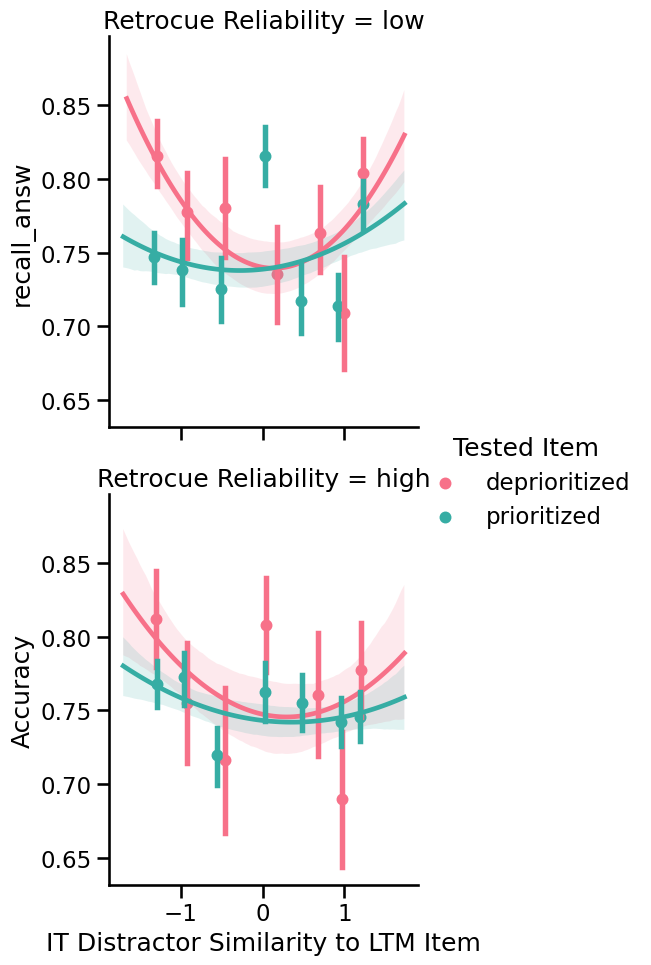

In [91]:

plt.figure(figsize=(10, 6))
sns.lmplot(
    x='IT Distractor Similarity to LTM Item',
    y='recall_answ',
    hue = 'Tested Item',
    row = 'Retrocue Reliability',
    x_bins = 7,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_filtered
)
plt.ylabel('Accuracy')

Text(109.31120833333334, 0.5, 'Accuracy')

<Figure size 1000x600 with 0 Axes>

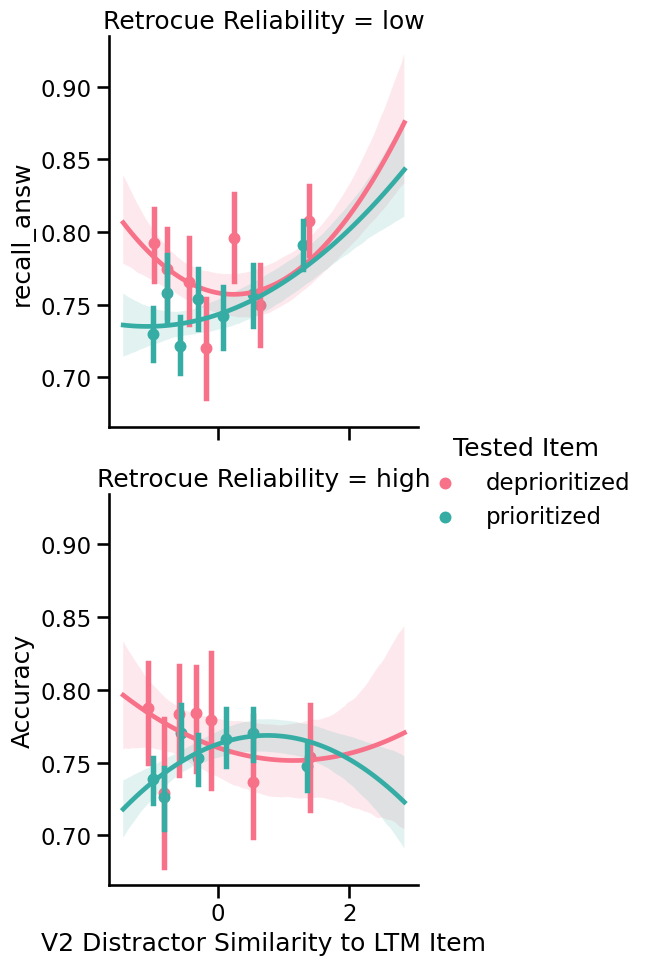

In [92]:

plt.figure(figsize=(10, 6))
sns.lmplot(
    x='V2 Distractor Similarity to LTM Item',
    y='recall_answ',
    hue = 'Tested Item',
    row = 'Retrocue Reliability',
    x_bins = 7,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_filtered
)
plt.ylabel('Accuracy')

Text(109.31120833333334, 0.5, 'Accuracy')

<Figure size 1000x600 with 0 Axes>

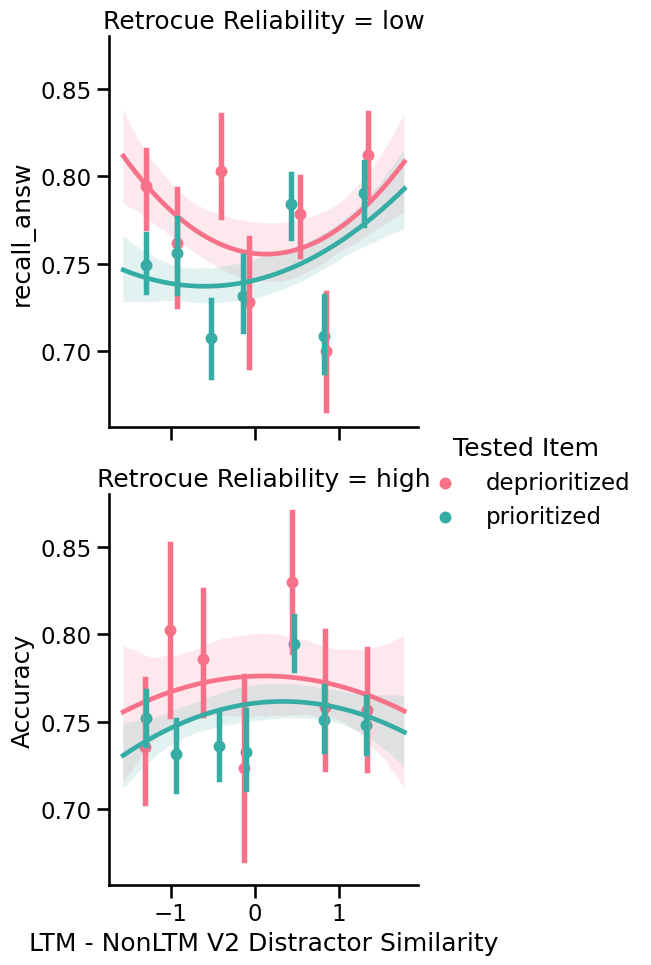

In [93]:

plt.figure(figsize=(10, 6))
sns.lmplot(
    x='LTM - NonLTM V2 Distractor Similarity',
    y='recall_answ',
    hue = 'Tested Item',
    row = 'Retrocue Reliability',
    x_bins = 7,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_filtered
)
plt.ylabel('Accuracy')

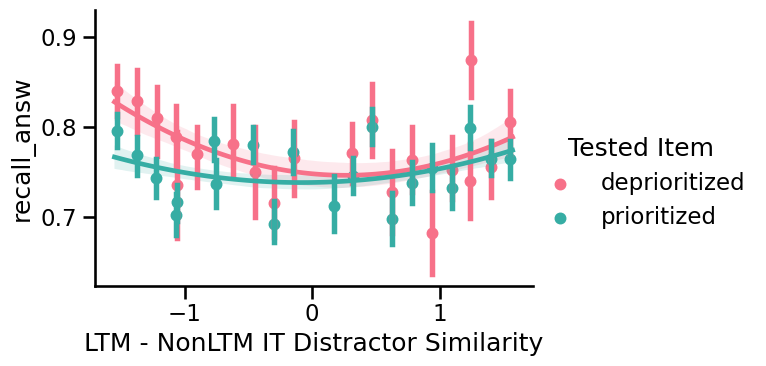

In [94]:
g = sns.lmplot(
    x='LTM - NonLTM IT Distractor Similarity',
    y='recall_answ',
    hue='Tested Item',
#     row='Retrocue Reliability', 
    x_bins=20,  # Increase number of bins
    height=4,   # Reduce height
    aspect=1.5, # Control width/height ratio
    order=2,
    ci=68,
    palette=palette[::-1],
    data=df_filtered
)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/3045935977.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(96.08554487179485, 0.5, 'Accuracy')

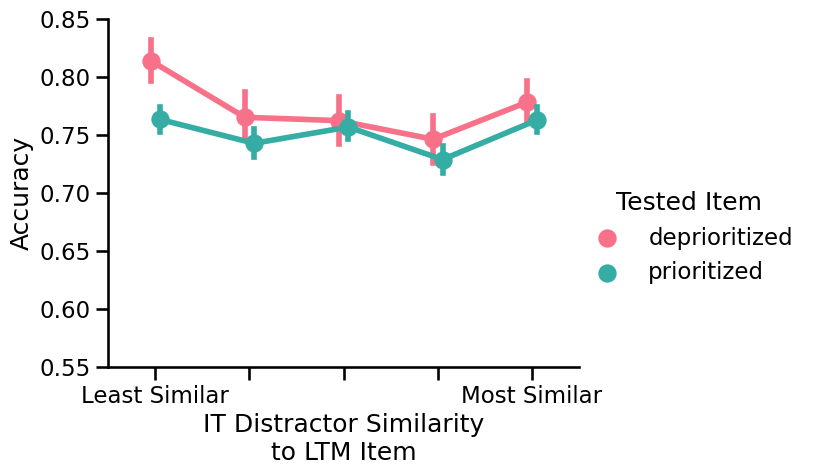

In [95]:
g = sns.catplot(
            x = 'IT Distractor Similarity\nto LTM Item',
            y = 'recall_answ',
            ci = 68,
            hue = 'Tested Item',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
            palette = palette[::-1],  # Reverse the color order
            data = df_filtered)
g.set(ylim=(0.55, 0.85))
plt.ylabel('Accuracy')


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/2715960387.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(830.4387926181889, 0.5, 'Accuracy')

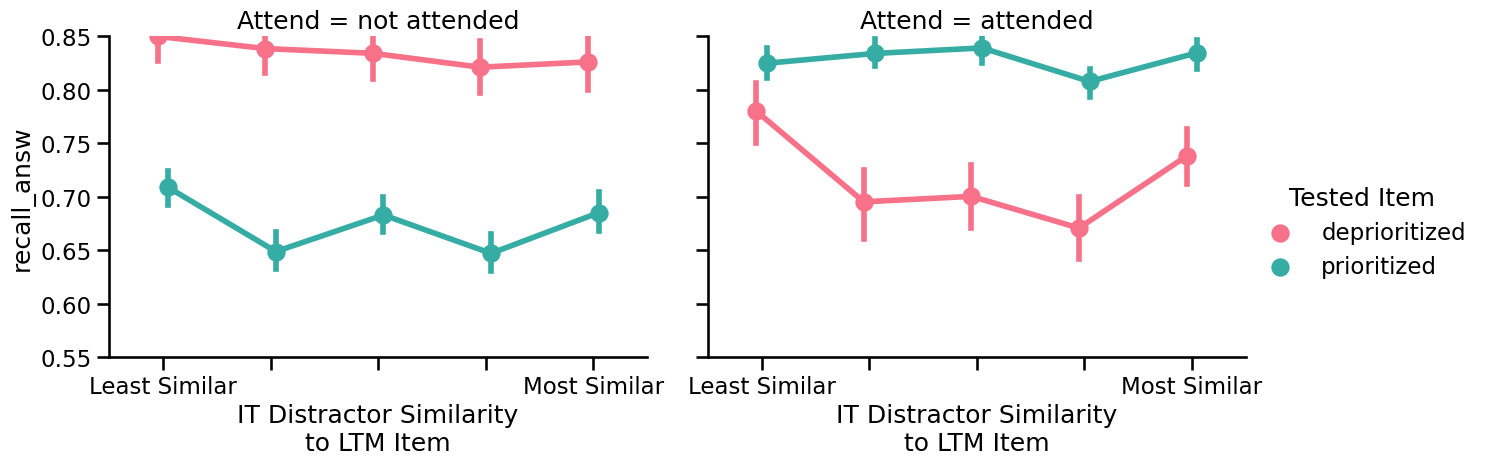

In [96]:
g = sns.catplot(
            x = 'IT Distractor Similarity\nto LTM Item',
            y = 'recall_answ',
            ci = 68,
            hue = 'Tested Item',
            col = 'Attend',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
            palette = palette[::-1],  # Reverse the color order
            data = df_filtered)
g.set(ylim=(0.55, 0.85))
plt.ylabel('Accuracy')


In [97]:
### When the seen image was validly tested

In [98]:
# df['attend']

In [99]:
# df['Attend']

In [100]:
# df['Attend Inc'] = df.apply(
#     lambda row: 'distractor' if row['ImagePath'] == row['ping_img']
#     else 'foil' if (row['category']== 'not attended')
#     else 'attended' if ((row['ImagePath'] == row['img1'] and row['attend'] == 'img1') or 
#                              (row['ImagePath'] == row['img2'] and row['attend'] == 'img2'))
#     else 'not attended',
#     axis=1
# )

In [101]:
unique_values = df['Attend'].unique()
unique_values

array(['not attended', 'foil', 'attended', 'distractor'], dtype=object)

In [102]:
# df['Reliability']

In [103]:
unique_values = df_filtered['Reliability'].unique()
print(unique_values)


['low' 'high']


In [104]:
df_correct_wm = df_filtered[
    ((df_filtered['resp_correct'] == 1))
]

# df_correct_wm = df[
#     ((df['resp_correct'] == 1) | (df['category'] == 'foil') | (df['category'] == 'distractor'))
# ]

df_incorrect_wm = df_filtered[
    ((df_filtered['resp_correct'] == 0))
]


In [105]:
df_incorrect_wm


,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,v2_ltm_diff_z,it_ltm_diff_z,v2_ltm_sq_z,it_ltm_sq_z,v2_ltm_diff_sq_z,it_ltm_diff_sq_z,LTM - NonLTM V2 Distractor Similarity,LTM - NonLTM IT Distractor Similarity,V2 Distractor Similarity to LTM Item,IT Distractor Similarity to LTM Item
25,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,1.353200,0.939327,1.000571,-1.041255,0.954802,-0.149809,1.353200,0.939327,1.563787,0.420152
32,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,1.146818,1.244628,-0.380278,0.089888,0.362083,0.699102,1.146818,1.244628,0.671303,1.034934
37,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,-0.631145,-1.381072,0.093329,1.518613,-0.691166,1.155235,-0.631145,-1.381072,-1.065281,-1.483573
38,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,1.659851,-1.229069,0.628660,0.410572,2.016217,0.650100,1.659851,-1.229069,1.381364,-1.150956
45,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,-0.608826,1.417597,0.036865,0.392188,-0.722958,1.285382,-0.608826,1.417597,-1.026282,1.144622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32317,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,0.516834,0.933432,-0.682882,0.188864,-0.841916,-0.163865,0.516834,0.933432,0.116211,1.072083
32321,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,-0.526264,-0.464911,-0.456083,-0.979408,-0.830616,-0.997993,-0.526264,-0.464911,0.584073,-0.474805
32336,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,0.582307,-1.549881,-0.413011,0.504083,-0.759244,1.785169,0.582307,-1.549881,0.635108,-1.182646
32337,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,1.647289,0.313626,1.452461,0.316603,1.968490,-1.147950,1.647289,0.313626,1.760179,1.118206


In [106]:
# df_filtered_correct_wm = df_correct_wm[df_correct_wm['category'].isin(['tested', 'not tested'])]

# # Create the catplot
# g = sns.catplot(
#     x='category',
#     y='recall_answ',
#     ci=68,
#     hue='Attend',
# #     col='Reliability',
#     aspect=1.3,
# #     dodge=0.1,
#     kind='bar',
# #     palette=palette,  # Reverse the color order
#     data=df,
#     order=['tested', 'not tested', 'foil', 'distractor'],  # Ensure correct x-axis order
#     hue_order=['attended', 'not attended', 'distractor', 'foil']  # Prioritize Tested Item categories
# )
# g.set_ylabels('Accuracy')

# # Set y-axis limits
# g.set(ylim=(0, 0.9))

# # Set y-axis label
# g


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/757550791.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


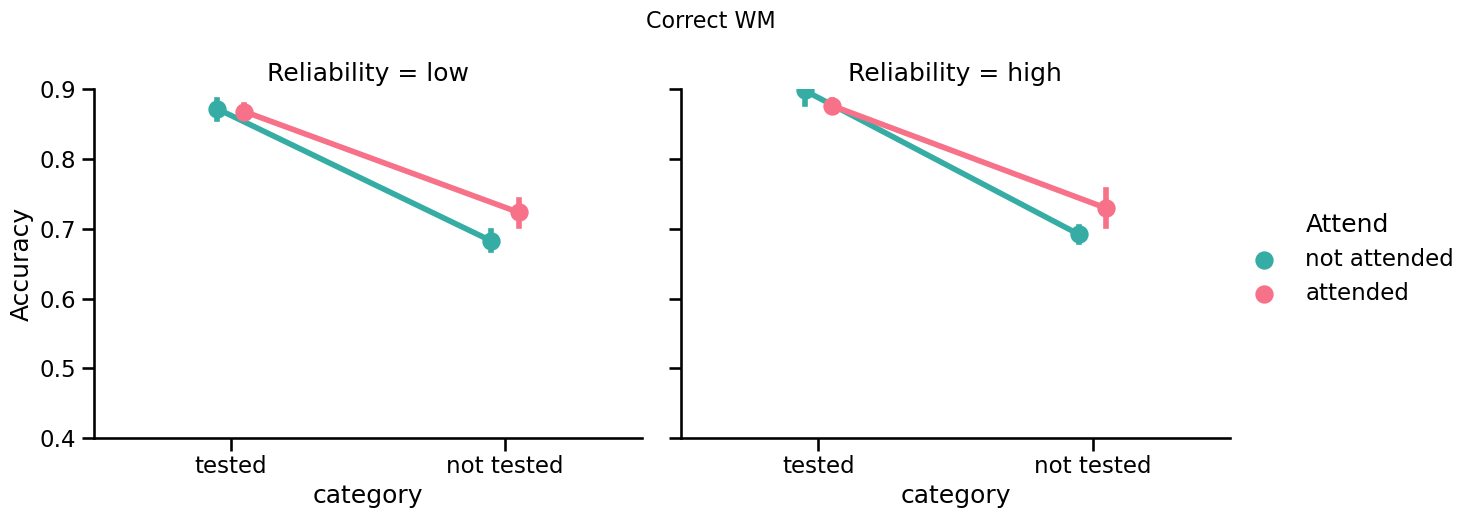

In [107]:
df_filtered_correct_wm = df_correct_wm[df_correct_wm['category'].isin(['tested', 'not tested'])]

# Create the catplot
g = sns.catplot(
    x='category',
    y='recall_answ',
    ci=68,
    hue='Attend',
    col='Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
    palette=palette,  # Reverse the color order
    data=df_filtered_correct_wm,
    order=['tested', 'not tested'],  # Ensure correct x-axis order
#     hue_order=tested_item_order  # Prioritize Tested Item categories
)
g.set_ylabels('Accuracy')

# Set y-axis limits
g.set(ylim=(0.4, 0.9))
g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing

# Set y-axis label
g


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/1762650958.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


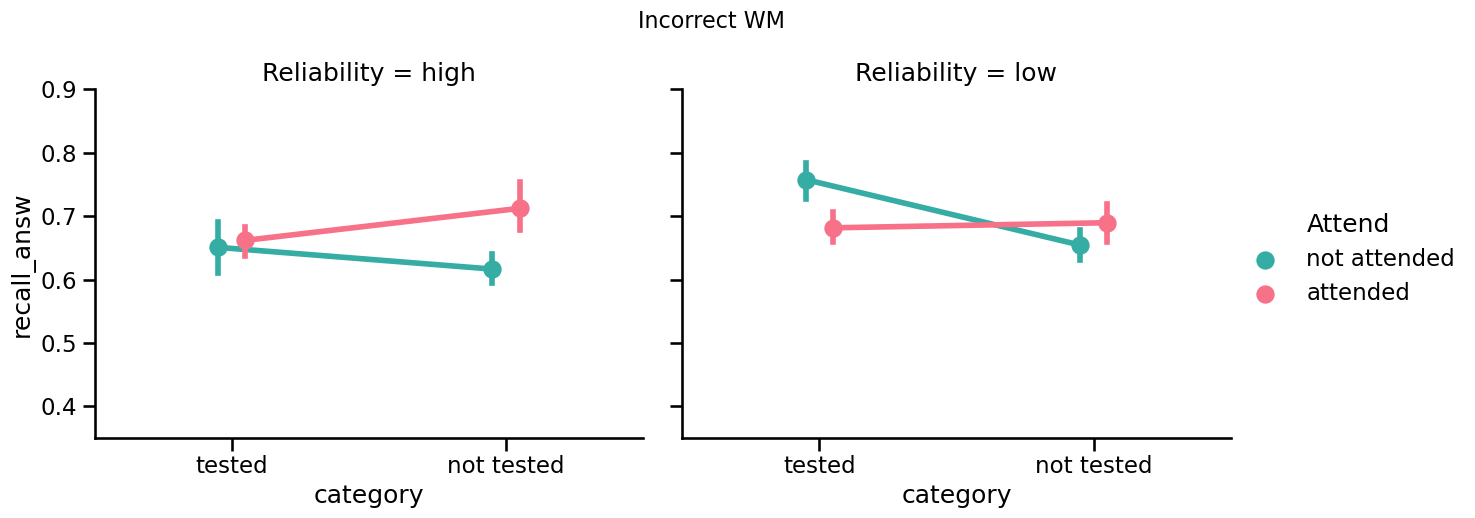

In [108]:
category_order = ['tested', 'not tested', 'foil', 'distractor']
df_filtered_incorrect_wm = df_incorrect_wm[df_incorrect_wm['category'].isin(['tested', 'not tested'])]

# Create the catplot
g = sns.catplot(
    x='category',
    y='recall_answ',
    ci=68,
    hue='Attend',
    col='Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
    palette=palette,  # Reverse the color order
    data=df_filtered_incorrect_wm,
    order=['tested', 'not tested']  # Ensure correct x-axis order
#     hue_order=tested_item_order  # Prioritize Tested Item categories
)

# Set y-axis limits
g.set(ylim=(0.35, 0.9))
g.fig.suptitle("Incorrect WM", y=1.05, fontsize=16)  # Adjust y for spacing

# Set y-axis label
g

In [109]:
df_correct_tested = df_correct_wm[
    ((df_correct_wm['category'] == 'tested')|(df_correct_wm['category'] == 'distractor'))
]

df_correct_untested = df_correct_wm[
    ((df_correct_wm['category'] == 'not tested')|(df_correct_wm['category'] == 'distractor'))

]

df_incorrect_tested = df_incorrect_wm[
    ((df_incorrect_wm['category'] == 'tested')|(df_incorrect_wm['category'] == 'distractor'))
]

df_incorrect_untested = df_incorrect_wm[
    ((df_incorrect_wm['category'] == 'not tested')|(df_incorrect_wm['category'] == 'distractor'))
]


In [110]:
df_correct_tested['Prioritized - Deprioritized V2 Distractor Similarity Ranges']

0         (-0.17, -0.11]
20           (0.04, 0.1]
23           (0.04, 0.1]
26           (0.04, 0.1]
31           (0.04, 0.1]
              ...       
32286     (-0.038, 0.04]
32289     (-0.17, -0.11]
32299    (-0.11, -0.038]
32312        (0.1, 0.17]
32322    (-0.11, -0.038]
Name: Prioritized - Deprioritized V2 Distractor Similarity Ranges, Length: 3652, dtype: category
Categories (5, interval[float64, right]): [(-0.17, -0.11] < (-0.11, -0.038] < (-0.038, 0.04] < (0.04, 0.1] < (0.1, 0.17]]

In [111]:
print(df_correct_tested['category'].unique())


['tested']


In [112]:
attend_palette = {
    'distractor': '#FFC0CB',  # Blue
    'not attended': '#90D5FF',  # Orange
    'attended': '#301934',  # Green
}

In [113]:
df_correct_tested

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,v2_ltm_diff_z,it_ltm_diff_z,v2_ltm_sq_z,it_ltm_sq_z,v2_ltm_diff_sq_z,it_ltm_diff_sq_z,LTM - NonLTM V2 Distractor Similarity,LTM - NonLTM IT Distractor Similarity,V2 Distractor Similarity to LTM Item,IT Distractor Similarity to LTM Item
0,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,1.555014,1.085206,1.582948,-0.020754,1.629038,0.226208,1.555014,1.085206,1.812935,0.991759
20,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,0.880687,-0.297199,-0.625538,-0.566857,-0.257774,-1.160725,0.880687,-0.297199,0.310396,-0.742768
23,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,0.821830,1.555445,-0.264637,0.419461,-0.372886,1.807164,0.821830,1.555445,0.785941,1.154006
26,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,0.820234,1.246446,-0.680180,1.533513,-0.375897,0.704869,0.820234,1.246446,-0.131940,1.487539
31,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,0.651747,0.172777,0.028769,-0.834833,-0.660804,-1.235175,0.651747,0.172777,1.020568,0.582903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32286,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,-0.009423,0.312120,-0.506214,-0.554494,-1.148670,-1.149150,-0.009423,0.312120,-0.518383,0.749320
32289,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,1.628105,-0.925138,2.120025,-0.872757,1.896309,-0.183492,1.628105,-0.925138,2.015589,-0.556582
32299,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,-0.610503,-0.918937,-0.225493,-1.032594,-0.720609,-0.198050,-0.610503,-0.918937,-0.821128,-0.428226
32312,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,1.170280,-1.371313,-0.172622,2.211807,0.424536,1.121034,1.170280,-1.371313,0.866389,-1.658071


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/373585094.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


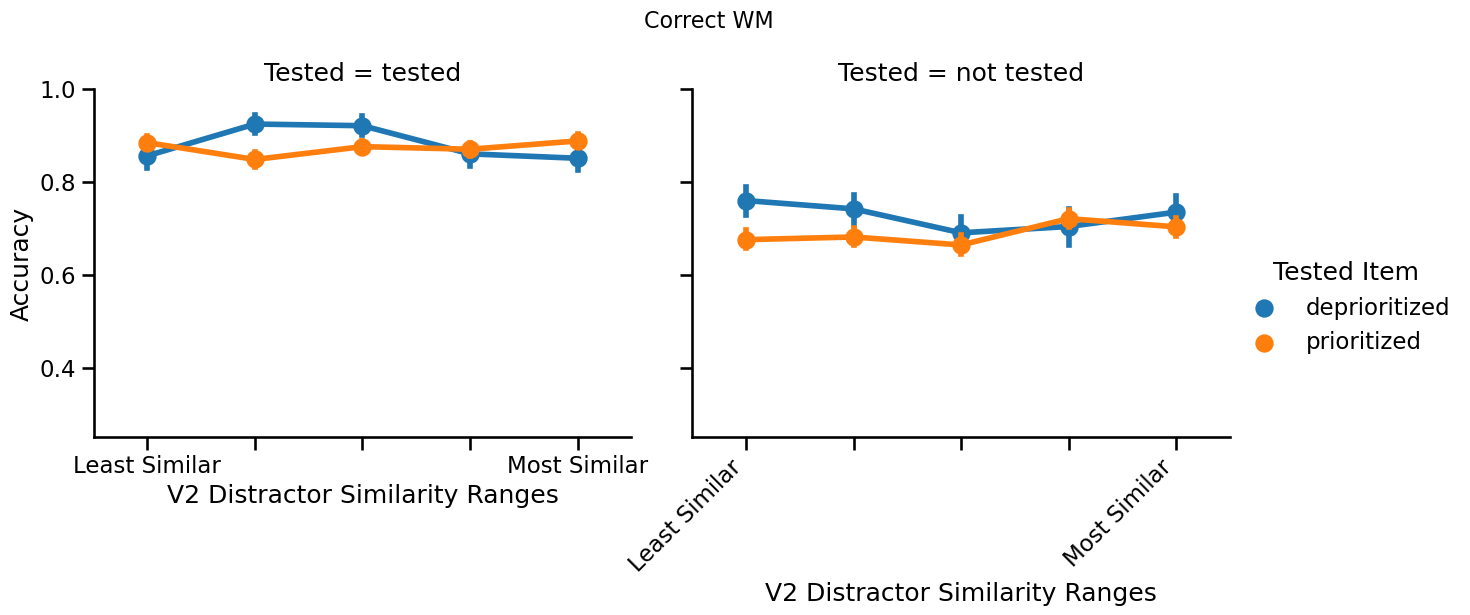

In [114]:
g = sns.catplot(
    x='LTM - NonLTM V2 Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Tested Item',
    col='Tested',
#     col='Retrocue Reliability',
    aspect=1.3,
#     dodge=0.1,
    kind='point',
#     palette=attend_palette,  # Reverse the color order
    data=df_correct_wm,

)

g.set(ylim=(0.25, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('V2 Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/981867469.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


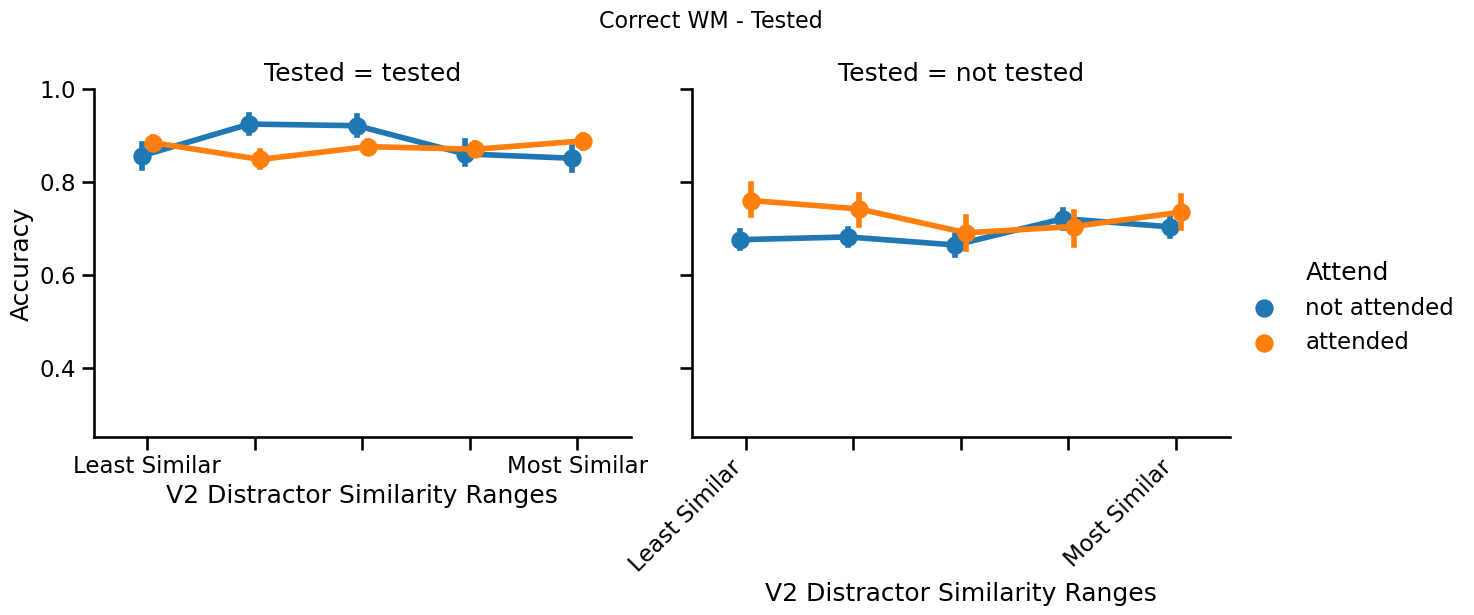

In [115]:
g = sns.catplot(
    x='LTM - NonLTM V2 Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Attend',
    col='Tested',
#     col='Retrocue Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
#     palette=attend_palette,  # Reverse the color order
    data=df_correct_wm,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

g.set(ylim=(0.25, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('V2 Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
g.fig.suptitle("Correct WM - Tested", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/3600274909.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


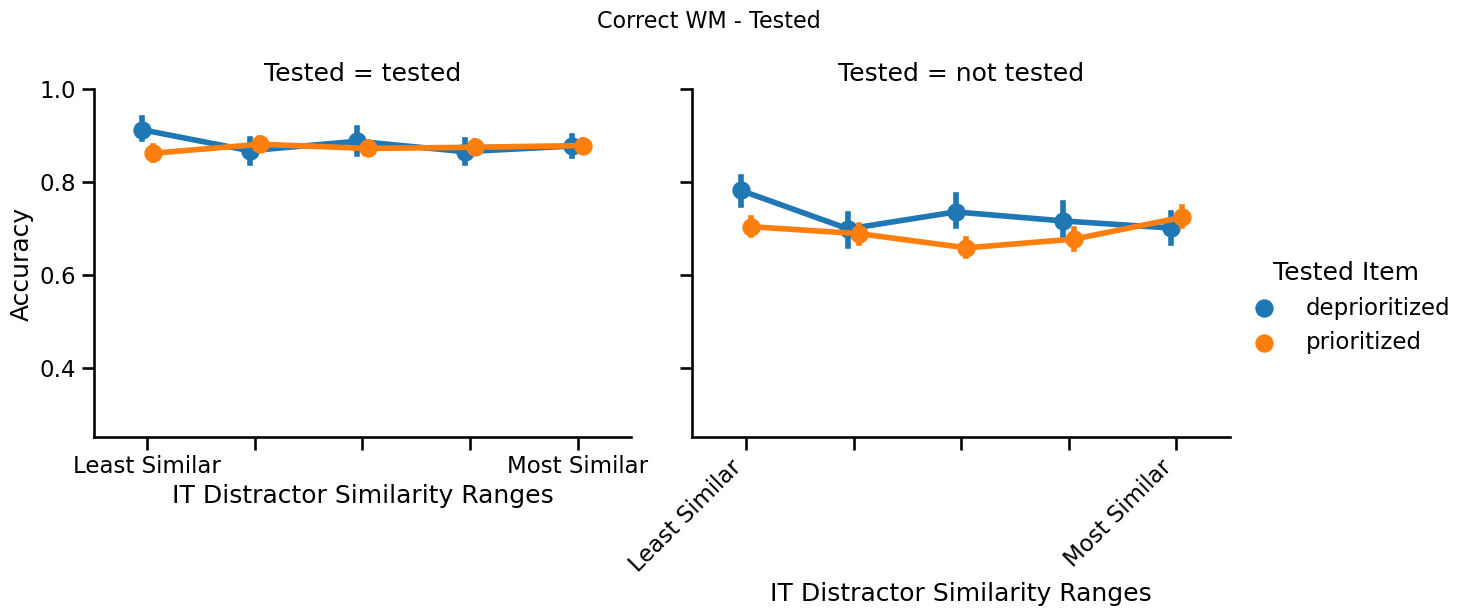

In [116]:
g = sns.catplot(
    x='LTM - NonLTM IT Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Tested Item',
    col='Tested',
#     col='Retrocue Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
#     palette=attend_palette,  # Reverse the color order
    data=df_correct_wm,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

g.set(ylim=(0.25, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('IT Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
g.fig.suptitle("Correct WM - Tested", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/1821993159.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


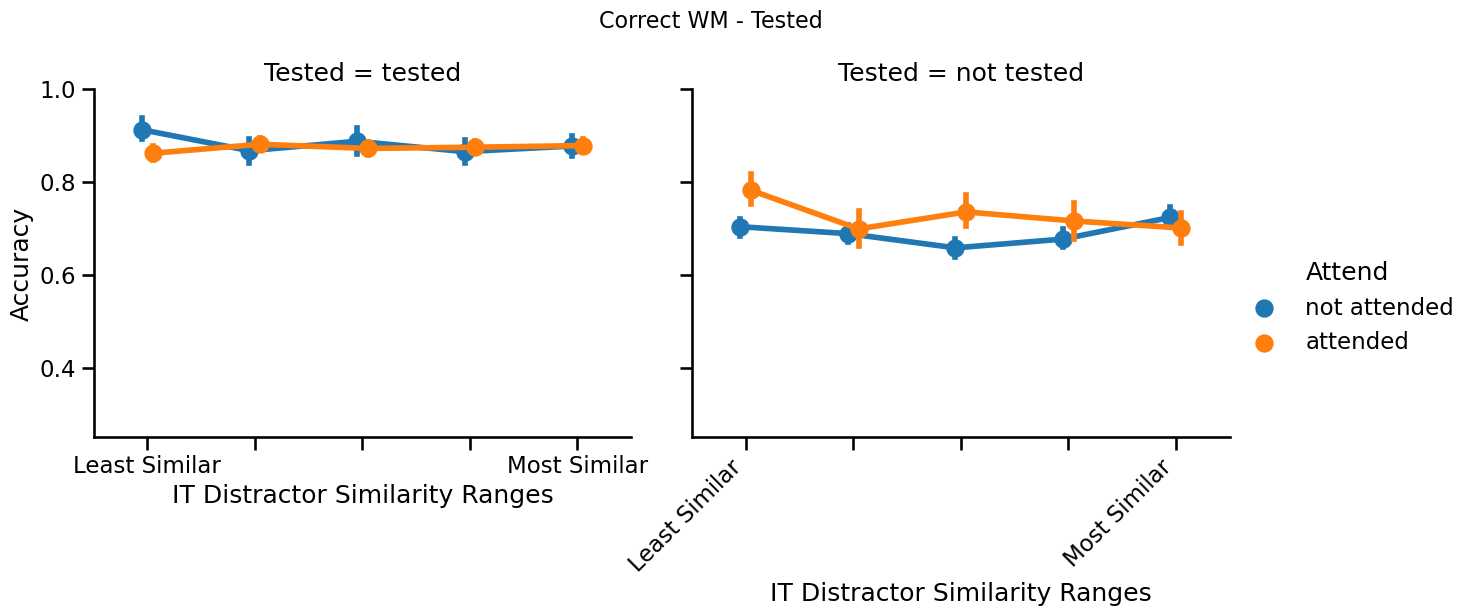

In [117]:
g = sns.catplot(
    x='LTM - NonLTM IT Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Attend',
    col='Tested',
#     col='Retrocue Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
#     palette=attend_palette,  # Reverse the color order
    data=df_correct_wm,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

g.set(ylim=(0.25, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('IT Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
g.fig.suptitle("Correct WM - Tested", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()


In [118]:
df['resp_correct_within'].min()

-0.2063681592039801

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/2164706510.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


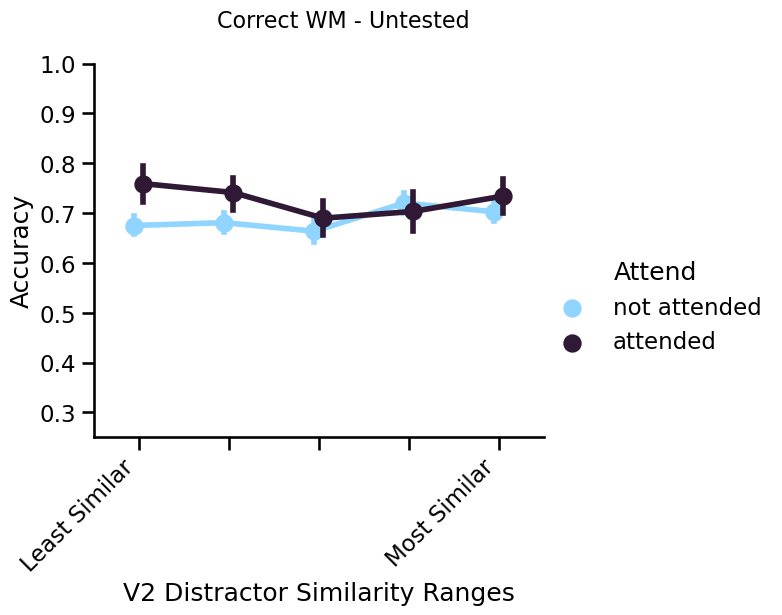

In [119]:
g = sns.catplot(
    x='LTM - NonLTM V2 Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Attend',
#     col='Reliability',
#     col_order=['low', 'high'],
    aspect=1.3,
    dodge=0.1,
    kind='point',
    palette=attend_palette,  # Reverse the color order
    data=df_correct_untested,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

g.set(ylim=(0.25, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('V2 Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
g.fig.suptitle("Correct WM - Untested", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()


In [120]:
# !pip install stargazer

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/3073544740.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


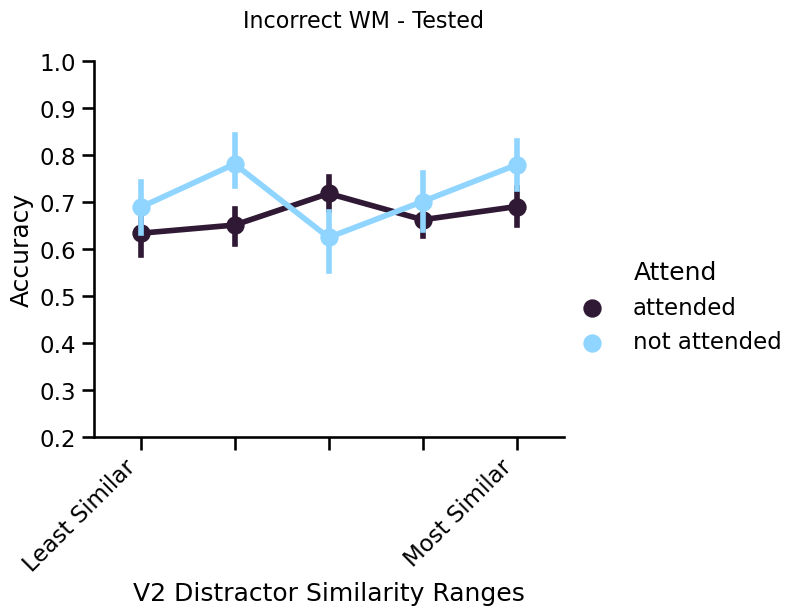

In [121]:
g = sns.catplot(
    x='LTM - NonLTM V2 Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Attend',
#     col='Reliability',
#     col_order=['low', 'high'],
    aspect=1.3,
#     dodge=0.1,
    kind='point',
    palette=attend_palette,  # Reverse the color order
    data=df_incorrect_tested,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

g.set(ylim=(0.2, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('V2 Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
g.fig.suptitle("Incorrect WM - Tested", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()

In [122]:
df_correct_tested

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,v2_ltm_diff_z,it_ltm_diff_z,v2_ltm_sq_z,it_ltm_sq_z,v2_ltm_diff_sq_z,it_ltm_diff_sq_z,LTM - NonLTM V2 Distractor Similarity,LTM - NonLTM IT Distractor Similarity,V2 Distractor Similarity to LTM Item,IT Distractor Similarity to LTM Item
0,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,1.555014,1.085206,1.582948,-0.020754,1.629038,0.226208,1.555014,1.085206,1.812935,0.991759
20,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,0.880687,-0.297199,-0.625538,-0.566857,-0.257774,-1.160725,0.880687,-0.297199,0.310396,-0.742768
23,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,0.821830,1.555445,-0.264637,0.419461,-0.372886,1.807164,0.821830,1.555445,0.785941,1.154006
26,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,0.820234,1.246446,-0.680180,1.533513,-0.375897,0.704869,0.820234,1.246446,-0.131940,1.487539
31,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,0.651747,0.172777,0.028769,-0.834833,-0.660804,-1.235175,0.651747,0.172777,1.020568,0.582903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32286,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,-0.009423,0.312120,-0.506214,-0.554494,-1.148670,-1.149150,-0.009423,0.312120,-0.518383,0.749320
32289,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,1.628105,-0.925138,2.120025,-0.872757,1.896309,-0.183492,1.628105,-0.925138,2.015589,-0.556582
32299,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,-0.610503,-0.918937,-0.225493,-1.032594,-0.720609,-0.198050,-0.610503,-0.918937,-0.821128,-0.428226
32312,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,1.170280,-1.371313,-0.172622,2.211807,0.424536,1.121034,1.170280,-1.371313,0.866389,-1.658071


In [123]:
df_incorrect_untested

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,v2_ltm_diff_z,it_ltm_diff_z,v2_ltm_sq_z,it_ltm_sq_z,v2_ltm_diff_sq_z,it_ltm_diff_sq_z,LTM - NonLTM V2 Distractor Similarity,LTM - NonLTM IT Distractor Similarity,V2 Distractor Similarity to LTM Item,IT Distractor Similarity to LTM Item
25,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,1.353200,0.939327,1.000571,-1.041255,0.954802,-0.149809,1.353200,0.939327,1.563787,0.420152
38,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,1.659851,-1.229069,0.628660,0.410572,2.016217,0.650100,1.659851,-1.229069,1.381364,-1.150956
45,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,-0.608826,1.417597,0.036865,0.392188,-0.722958,1.285382,-0.608826,1.417597,-1.026282,1.144622
64,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,0.313572,-0.146758,-0.641579,-1.246754,-1.035817,-1.245760,0.313572,-0.146758,-0.270504,-0.118365
68,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,0.574100,0.465737,-0.646631,-1.221381,-0.770148,-0.997015,0.574100,0.465737,0.256658,-0.184599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32316,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,0.897815,-0.596680,-0.225705,-0.383390,-0.222780,-0.819894,0.897815,-0.596680,0.820942,-0.834744
32317,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,0.516834,0.933432,-0.682882,0.188864,-0.841916,-0.163865,0.516834,0.933432,0.116211,1.072083
32336,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,0.582307,-1.549881,-0.413011,0.504083,-0.759244,1.785169,0.582307,-1.549881,0.635108,-1.182646
32337,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,1.647289,0.313626,1.452461,0.316603,1.968490,-1.147950,1.647289,0.313626,1.760179,1.118206


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/2582872216.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


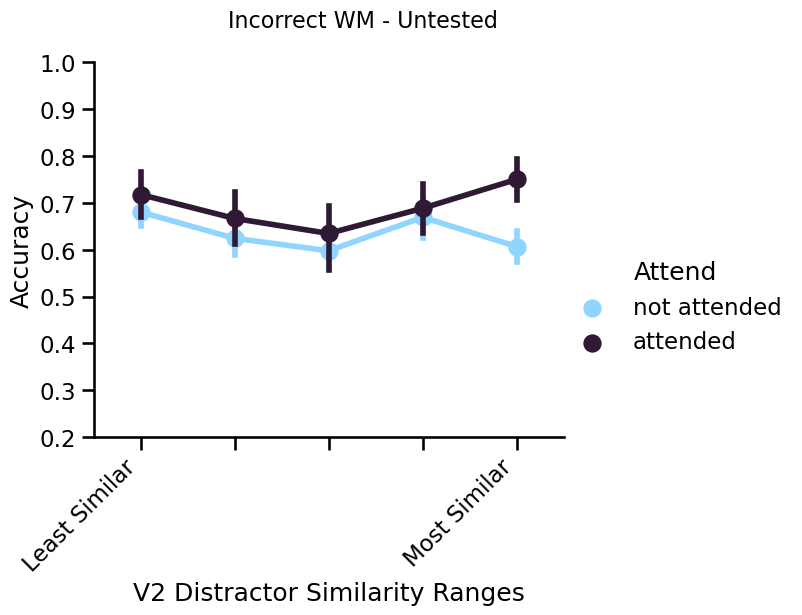

In [124]:
g = sns.catplot(
    x='LTM - NonLTM V2 Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Attend',
#     col='Reliability',
#     col_order=['low', 'high'],
    
    aspect=1.3,
#     dodge=0.1,
    kind='point',
    palette=attend_palette,  # Reverse the color order
    data=df_incorrect_untested,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

g.set(ylim=(0.2, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('V2 Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
g.fig.suptitle("Incorrect WM - Untested", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()

In [125]:
df_correct_wm['category']

0            tested
2        not tested
16       not tested
19       not tested
20           tested
            ...    
32299        tested
32310    not tested
32312        tested
32322        tested
32360    not tested
Name: category, Length: 7327, dtype: object

In [126]:
# !pip install rpy2


In [127]:

# model = smf.glm(
#     formula="recall_answ ~ resp_correct + category * validity_binary * reliability_binary * it_sim_dis_diff_z * v2_sim_dis_diff_z",
#     data=df_correct_wm,
#     family=sm.families.Binomial()  # Binary outcomes
# )


# ### here recall_answ = 1 if ltm task correct, 0 if its wrong
# ### resp_correct = 1 if wm correct
# ### category : tested, not tested, distractor, foil?

# results = model.fit()

# print(results)

In [128]:

# print(results.summary())


In [129]:
# df_correct_wm_no_dist = df_correct_wm[
#     (df_correct_wm['category'] != 'distractor')
# ]

# df_incorrect_wm_no_dist = df_incorrect_wm[
#     (df_incorrect_wm['category'] != 'distractor')
# ]


In [130]:
# df_correct_wm_no_dist['Attend']

In [131]:

# df_correct_wm_no_dist['attend_binary'] = np.where(df_correct_wm_no_dist['Attend'] == 'attended', -1 , 1)


In [132]:
# df_correct_wm_no_dist['attend_binary'] 

In [133]:
### include if the ltm item that is in wm correct dataframe was tested or not in the wm

## tested vs untested in wm wrt to the wm item

In [134]:
# df_correct_wm_no_dist['test']

In [135]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

df_correct_wm['attend_binary'] = np.where(df_correct_wm['Attend'] == 'attended', -1 , 1)
df_correct_wm['reliability_binary'] = np.where(df_correct_wm['Reliability'] == 'low', -1 , 1)
df_correct_wm['tested_binary'] =  np.where(df_correct_wm['Tested'] == 'tested', -1 , 1)
df_correct_wm['priority_binary'] =  np.where(df_correct_wm['Tested Item'] == 'prioritized', -1 , 1)
df_correct_wm['reliability_binary_z'] = scaler.fit_transform(df_correct_wm[['reliability_binary']])
df_correct_wm['attend_binary_z'] = scaler.fit_transform(df_correct_wm[['attend_binary']])
df_correct_wm['tested_binary_z'] = scaler.fit_transform(df_correct_wm[['tested_binary']])
df_correct_wm['priority_binary_z'] = scaler.fit_transform(df_correct_wm[['priority_binary']])



/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/1608619557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_wm['attend_binary'] = np.where(df_correct_wm['Attend'] == 'attended', -1 , 1)
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/1608619557.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_wm['reliability_binary'] = np.where(df_correct_wm['Reliability'] == 'low', -1 , 1)
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_22527/16086195

In [136]:
# df_correct_wm_no_dist['mem_stim_type'] = np.where(df_correct_wm_no_dist['mem_stim_type'] == 'tested', -1 , 1)

# df_correct_wm_no_dist['mem_stim_type_z'] = scaler.fit_transform(df_correct_wm_no_dist[['mem_stim_type']])


In [137]:
df_filtered['Tested Item']

0        deprioritized
2          prioritized
16         prioritized
19       deprioritized
20         prioritized
             ...      
32322    deprioritized
32336      prioritized
32337      prioritized
32354      prioritized
32360      prioritized
Name: Tested Item, Length: 9724, dtype: object

In [138]:
df_correct_wm.to_csv('pilot5_stats/correct_wm_ltm.csv', index=False)


In [139]:
df_incorrect_wm.to_csv('pilot5_stats/incorrect_wm_ltm.csv', index=False)


In [140]:
df_distractor.to_csv('pilot5_stats/distractor_wm_ltm.csv', index=False)


In [141]:
# df_incorrect_wm

In [142]:
df_wm = pd.concat([df_correct_wm, df_incorrect_wm], axis=0)
df_wm

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,LTM - NonLTM IT Distractor Similarity,V2 Distractor Similarity to LTM Item,IT Distractor Similarity to LTM Item,attend_binary,tested_binary,priority_binary,reliability_binary_z,attend_binary_z,tested_binary_z,priority_binary_z
0,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,1.085206,1.812935,0.991759,1.0,-1.0,1.0,-1.017208,1.006161,-1.003144,1.860710
2,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,-1.370822,-0.410574,-1.292399,1.0,1.0,-1.0,-1.017208,1.006161,0.996866,-0.537429
16,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,0.309374,-0.468034,-0.257340,1.0,1.0,-1.0,0.983083,1.006161,0.996866,-0.537429
19,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,1.395007,-0.874074,0.953064,-1.0,1.0,1.0,-1.017208,-0.993877,0.996866,1.860710
20,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.940120,NaN,NaN,...,-0.297199,0.310396,-0.742768,-1.0,-1.0,-1.0,0.983083,-0.993877,-1.003144,-0.537429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32317,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,0.933432,0.116211,1.072083,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32321,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,-0.464911,0.584073,-0.474805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32336,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,-1.549881,0.635108,-1.182646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32337,NaN,NaN,158263,2024-10-29 00:05:43.005,WM_Deepgen,2023.2.1,Win32,60.240964,NaN,NaN,...,0.313626,1.760179,1.118206,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
df_wm_no_dist = df_wm[
    (df_wm['category'] != 'distractor')
]


In [144]:
# df_wm_no_dist.to_csv('pilot5_stats/wm_ltm_no_dist.csv')

In [145]:
# sub_df_valid = df[df.apply(lambda row: any((df['participant'] == row['participant']) & (df['img1'] == row['ImagePath'])), axis=1)]
df_valid_attend = df[
    ((df['ImagePath'] == df['img1']) & (df['validity'] == 'valid') & (df['attend'] == 'img1'))|
    ((df['ImagePath'] == df['img2']) & (df['validity'] == 'valid') & (df['attend'] == 'img2'))
]

df_valid_unattend = df[
    ((df['ImagePath'] == df['img1']) & (df['validity'] == 'valid') & (df['attend'] == 'img2'))|
    ((df['ImagePath'] == df['img2']) & (df['validity'] == 'valid') & (df['attend'] == 'img1'))
]

df_invalid_attend = df[
    ((df['ImagePath'] == df['img1']) & (df['validity'] == 'invalid') & (df['attend'] == 'img1'))|
    ((df['ImagePath'] == df['img2']) & (df['validity'] == 'invalid') & (df['attend'] == 'img2'))
]

df_invalid_unattend = df[
    ((df['ImagePath'] == df['img1']) & (df['validity'] == 'invalid') & (df['attend'] == 'img2'))|
    ((df['ImagePath'] == df['img2']) & (df['validity'] == 'invalid') & (df['attend'] == 'img1'))
]

In [146]:
print("No Problemo 2")

No Problemo 2


In [147]:
# df_attended = pd.concat([df_valid_attend, df_invalid_attend], ignore_index=True)


In [148]:
## wm accuracy by priority and tested item

##is being tested before showing any effect
## also split by correct and incorrect trials from wm task

In [149]:
### first categoriaze by wm task if they were correct or incorrect


### then memory for tested and untested items as a function of wherer they were prioritized or deprioritized

In [150]:
# df

In [151]:
# df['category_wm_ltm'] = 

In [152]:
# df_correct_wm = df[
#     ((df['resp_correct'] == 1)) ]


In [153]:
# df_incorrect_wm = df[
#     ((df['resp_correct'] == 0)) ]


In [154]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_correct_wm)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [155]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_correct_wm)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [156]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_correct_wm)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [157]:
# g = sns.catplot(
#             x = 'V2 Distractor Similarity\nto Prioritized Item',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [158]:
# g = sns.catplot(
#             x = 'V2 Distractor Similarity\nto Deprioritized Item',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [159]:
##tested/untested and distractor and then split up by prioritized and deprioritized

In [160]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [161]:
# g = sns.catplot(
#             x = 'IT Distractor Similarity\nto Prioritized Item',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [162]:
# g = sns.catplot(
#             x = 'IT Distractor Similarity\nto Deprioritized Item',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [163]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [164]:
# import numpy as np

# # Define the conditions for each case
# conditions = [
#     ((df['ImagePath'] == df['img1']) & (df['validity'] == 'valid') & (df['attend'] == 'img1')) |
#     ((df['ImagePath'] == df['img2']) & (df['validity'] == 'valid') & (df['attend'] == 'img2')),

#     ((df['ImagePath'] == df['img1']) & (df['validity'] == 'valid') & (df['attend'] == 'img2')) |
#     ((df['ImagePath'] == df['img2']) & (df['validity'] == 'valid') & (df['attend'] == 'img1')),

#     ((df['ImagePath'] == df['img1']) & (df['validity'] == 'invalid') & (df['attend'] == 'img1')) |
#     ((df['ImagePath'] == df['img2']) & (df['validity'] == 'invalid') & (df['attend'] == 'img2')),

#     ((df['ImagePath'] == df['img1']) & (df['validity'] == 'invalid') & (df['attend'] == 'img2')) |
#     ((df['ImagePath'] == df['img2']) & (df['validity'] == 'invalid') & (df['attend'] == 'img1'))
# ]

# # Define the assignments for each case
# assignments = [
#     # Condition 1: Valid and attended image is the same
#     {
#         'seen_img': 'tested',
#         'IT_to_seen_image': df['it_sim_dis_attend'],
#         'V2_to_seen_image': df['v2_sim_dis_attend'],
#         'IT_relative': df['Prioritized - Deprioritized IT Distractor Similarity Ranges'],
#         'V2_relative': df['Prioritized - Deprioritized V2 Distractor Similarity Ranges']
#     },
#     # Condition 2: Valid but attended image is not the same, flipping certain fields
#     { 
# #         flip retrocue
#         'seen_img': 'not tested',
#         'IT_to_seen_image': df['it_sim_dis_unattend'],
#         'V2_to_seen_image': df['v2_sim_dis_unattend'],
#         'IT_relative': np.where(df['attend'] == 'img2', df['IT_root_im1'] - df['IT_root_im2'], df['IT_root_im2'] - df['IT_root_im1']),
#         'V2_relative': np.where(df['attend'] == 'img2', df['V2_root_im1'] - df['V2_root_im2'], df['V2_root_im2'] - df['V2_root_im1'])
#     },
#     # Condition 3: Invalid and attended image is the same
#     {
#         'seen_img': 'not tested',
#         'IT_to_seen_image': df['it_sim_dis_attend'],
#         'V2_to_seen_image': df['v2_sim_dis_attend'],
#         'IT_relative': df['Prioritized - Deprioritized IT Distractor Similarity Ranges'],
#         'V2_relative': df['Prioritized - Deprioritized V2 Distractor Similarity Ranges']
#     },
#     # Condition 4: Invalid and attended image is not the same
#     {#         flip retrocue

#         'seen_img': 'tested',
#         'IT_to_seen_image': df['it_sim_dis_unattend'],
#         'V2_to_seen_image': df['v2_sim_dis_unattend'],
#         'IT_relative': np.where(df['attend'] == 'img2', df['IT_root_im1'] - df['IT_root_im2'], df['IT_root_im2'] - df['IT_root_im1']),
#         'V2_relative': np.where(df['attend'] == 'img2', df['V2_root_im1'] - df['V2_root_im2'], df['V2_root_im2'] - df['V2_root_im1'])
#     }
# ]

# # Apply each condition to assign values
# for column, values in assignments[0].items():
#     df[column] = np.select(conditions, [assignment[column] for assignment in assignments], default=np.nan)

# # # Additional derived columns
# # df['it_sim_dis_diff'] = np.where(df['attend'] == 'img1', df['IT_root_im1'] - df['IT_root_im2'], df['IT_root_im2'] - df['IT_root_im1'])
# # df['v2_sim_dis_diff'] = np.where(df['attend'] == 'img1', df['V2_root_im1'] - df['V2_root_im2'], df['V2_root_im2'] - df['V2_root_im1'])

# # Normalize 'it_sim_dis_diff'
# df['it_sim_dis_diff'] = df['it_sim_dis_diff'] - df['it_sim_dis_diff'].mean(skipna=True)


In [165]:
# df['it_sim_dis_unattend']

In [166]:
# g = sns.catplot(
#             x = 'IT_relative',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [167]:
# sub_df = df[df.apply(lambda row: any((df['participant'] == row['participant']) & (df['ping_img'] == row['ImagePath'])), axis=1)]

# Display the resulting sub_df to the user
# tools.display_dataframe_to_user(name="Sub DF where ImagePath equals ping_im", dataframe=sub_df)


In [168]:
# sub_df

In [169]:
# g = sns.catplot(
#             x = 'V2 Distractor Similarity\nto Prioritized Item',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = sub_df)

# g.set(ylim=(0, 1))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Distractor images seen", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [170]:
# g = sns.catplot(
#             x = 'IT Distractor Similarity\nto Prioritized Item',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = sub_df)

# g.set(ylim=(0, 1))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Distractor images seen", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [171]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = sub_df)

# g.set(ylim=(0, 1))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Distractor images seen", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [172]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized IT Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = sub_df)

# g.set(ylim=(0, 1))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Distractor images seen", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [173]:
# recalled_images = df[df['acc_recall'] == 1]

# def check_image_presence(row):
#     image_path = row['ImagePath']
#     participant = row['participant']
    
#     # Filter the original DataFrame for the same participant
#     participant_images = df[df['participant'] == participant]
#     if image_path in participant_images['ping_img'].values:
#             return True
# #     return is_present

# # Step 3: Apply the function and create a new column
# recalled_images.apply(check_image_presence, axis=1)

# # # Display the filtered DataFrame
# # print(recalled_images[['ImagePath', 'participant', 'image_present']==True])


In [174]:

# # Create a mapping for the answers
# answer_mapping = {1: 'Definitely not seen', 2: 'Probably not seen',
#                   3: 'Probably seen', 4: 'Definitely seen'}



# combined_df['Answer Labels'] = combined_df['image_recall_response.keys'].map(answer_mapping)

# # Plotting the distribution of answer labels for each participant
# plt.figure(figsize=(15, 8))
# sns.countplot(data=combined_df, x='participant', hue='Answer Labels', palette='viridis')
# plt.title('Distribution of Answers by Participant')
# plt.xlabel('Participant ID')
# plt.ylabel('Count')
# plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
# plt.legend(title='Answer Labels', bbox_to_anchor=(1, 1))  # Move the legend out of the plot
# plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
# plt.show()

In [175]:
# new_data = combined_df

In [176]:
# new_data['image_seen'] = new_data['acc_recall']

# recall_response_column = 'image_recall_response.keys'

# new_data['recall_response'] = new_data[recall_response_column].map({1: 'not remembered', 2: 'not remembered', 3: 'remembered', 4: 'remembered'})
# recall_bias = new_data['recall_response'].value_counts(normalize=True)

# # 1. Overall recall response distribution
# recall_dist = new_data['recall_response'].value_counts()

# # Ensure 'image_seen' is boolean
# new_data['image_seen'] = new_data['acc_recall'].astype(bool)

# # Handle NaN values in 'recall_response'
# new_data['recall_response'] = new_data['recall_response'].fillna('unknown')
# accuracy_dist = new_data['image_seen'].value_counts()

# # Calculate recall response distribution for seen and not seen images
# seen_recall_dist = new_data[new_data['image_seen']]['recall_response'].value_counts()
# not_seen_recall_dist = new_data[~new_data['image_seen']]['recall_response'].value_counts()

# seen_recall_dist = seen_recall_dist[seen_recall_dist.index != 'unknown']
# not_seen_recall_dist = not_seen_recall_dist[not_seen_recall_dist.index != 'unknown']

# # Print the distributions for verification
# print("Recall Response Distribution for Seen Images:")
# print(seen_recall_dist)

# print("\nRecall Response Distribution for Not Seen Images:")
# print(not_seen_recall_dist)

# plt.figure(figsize=(12, 6))
# plt.figure(figsize=(18, 6)) 

# # Accuracy of Recall Plot
# plt.subplot(1, 3, 1)
# sns.barplot(x=accuracy_dist.index, y=accuracy_dist.values)
# plt.title('Accuracy of Recall', fontsize=14)  # Set title font size
# plt.xlabel('Is Recall Correct', fontsize=12)   # Set x-label font size
# plt.ylabel('Count', fontsize=12)              # Set y-label font size

# # Recall Bias Plot
# plt.subplot(1, 3, 2)
# sns.barplot(x=recall_bias.index, y=recall_bias.values)
# plt.title('Recall Bias', fontsize=14)
# plt.xlabel('Recall Response', fontsize=12)
# plt.ylabel('Proportion', fontsize=12)

# # Recall Response Distribution for Seen and Not Seen Images
# #  seen_recall_dist and not_seen_recall_dist are already calculated
# plt.subplot(1, 3, 3)
# sns.barplot(x=seen_recall_dist.index, y=seen_recall_dist.values)
# plt.title('Recall Response for Seen Images', fontsize=14)
# plt.xlabel('Recall Response', fontsize=12)
# plt.ylabel('Count', fontsize=12)

# plt.tight_layout() 
# plt.show()

In [177]:
# plt.figure(figsize=(8, 5))
# recall_dist.plot(kind='bar', color='lightblue')
# plt.title('Overall Recall Response Distribution')
# plt.xlabel('Recall Response')
# plt.ylabel('Count')
# plt.xticks(rotation=0)  # Rotate x labels if necessary
# plt.tight_layout()
# plt.show()

In [178]:
# plt.figure(figsize=(12, 5))

# # Subplot for seen images
# plt.subplot(1, 2, 1)
# seen_recall_dist.plot(kind='bar', color='lightgreen')
# plt.title('Recall Response Distribution for Seen Images')
# plt.xlabel('Recall Response')
# plt.ylabel('Count')
# plt.xticks(rotation=0)

# # Subplot for not seen images
# plt.subplot(1, 2, 2)
# not_seen_recall_dist.plot(kind='bar', color='salmon')
# plt.title('Recall Response Distribution for Not Seen Images')
# plt.xlabel('Recall Response')
# plt.ylabel('Count')
# plt.xticks(rotation=0)

# plt.tight_layout()
# plt.show()